# Kernel SVMs (RBF, Polynomial)


Welcome back, data adventurer! 🧙‍♂️
You’ve mastered **linear SVMs**, but let’s be honest — not every dataset lines up neatly.
Some are *curvy*, *twisty*, or *chaotically rebellious*.

Enter: **Kernel SVMs**, the model equivalent of wearing *VR goggles for your data*. 🎮

---

## 🎭 The Problem with Reality

Here’s the drama:
Your data isn’t always linearly separable.

Example:
- Red = customers who churn
- Blue = loyal customers
If plotted, they form two *concentric circles*.

No straight line can separate them.
You could try rotating your laptop — still no luck. 🙃

---

## 💡 The Idea Behind Kernels

What if we could **transform the data** into a higher dimension
where a linear boundary *is* possible?

That’s what a **kernel** does —
it’s a mathematical trick that *projects data into a new space*
without explicitly computing the coordinates there.

> “We go to higher dimensions… but we don’t pay the rent.” 🧠💸

---

## ✨ The Kernel Trick (aka SVM’s Magic Spell)

Instead of calculating the actual transformation,
we just compute the **dot product in the transformed space**, using a function called a **kernel**.

Formally, if φ(x) maps x to a higher dimension,
then instead of computing φ(x₁) and φ(x₂),
we use a **kernel function** K such that:

\[
K(x_1, x_2) = φ(x_1)^T φ(x_2)
\]

This lets us train complex non-linear models
with the **same math** as linear SVMs. 🧙‍♀️✨

---

## ⚙️ Common Kernel Types

### 1. **Linear Kernel**
\[
K(x_1, x_2) = x_1^T x_2
\]
- Fast and simple.
- Equivalent to the linear SVM we already learned.

Use it when:
> “The data looks like it just needs a good straight line and a hug.” 🤝

---

### 2. **Polynomial Kernel**
\[
K(x_1, x_2) = (x_1^T x_2 + c)^d
\]

- Adds interaction and power terms automatically.
- Captures *curvy relationships* like loyalty vs. spending power.

Example parameters:
- `degree=2` → quadratic boundary
- `degree=3` → wavy and flexible

> Polynomial kernels: *“Because sometimes your data just wants to be dramatic.”* 🎭

---

### 3. **RBF (Radial Basis Function / Gaussian) Kernel**
\[
K(x_1, x_2) = \exp(-\gamma ||x_1 - x_2||^2)
\]

- The most popular kernel!
- Captures complex, non-linear boundaries beautifully.
- Each point has an influence radius — the smaller `γ`, the wider the influence.

Intuitively:
> RBF builds little hills of “influence” around each point,
> and the decision boundary weaves through those hills like a racetrack. 🏎️

---

## 🔬 Quick Visual Demo

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Make circular data (not linearly separable)
X, y = datasets.make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)

# Fit RBF kernel SVM
clf = svm.SVC(kernel='rbf', gamma=0.7)
clf.fit(X, y)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Evaluate on grid
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Contours
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           linestyles=['--', '-', '--'])
plt.title("SVM with RBF Kernel – When Lines Aren’t Enough ✨")
plt.show()
````

🎨 Notice how the boundary *curves around* the data —
like it’s doing yoga to fit the pattern. 🧘‍♀️

---

## 🧠 Hyperparameters to Watch

| Parameter | Effect                                                                     |
| --------- | -------------------------------------------------------------------------- |
| `C`       | Tradeoff between margin width and misclassification (just like linear SVM) |
| `gamma`   | Controls how far each training example’s influence reaches                 |
| `degree`  | Only for polynomial kernel – controls curve complexity                     |

🗣️ “If your model overfits, reduce `gamma` or `degree`.
If it underfits, increase them.
Basically, play data DJ until it sounds right.” 🎧

---

## 💼 Business Example

Imagine classifying **customer churn** based on:

* monthly charges
* tenure
* contract type

The decision surface might not be linear —
customers with high tenure *and* high charges might behave differently
from those with high tenure *and* low charges.

An RBF kernel helps your SVM *bend* and *adapt* to these nuanced regions,
making smarter predictions in complex business landscapes.

---

## 🧪 Try It Yourself

1. Create data with `make_moons()` or `make_circles()`.
2. Fit SVMs with different kernels:

   ```python
   for kernel in ['linear', 'poly', 'rbf']:
       clf = svm.SVC(kernel=kernel, gamma=0.7, degree=3)
       clf.fit(X, y)
   ```
3. Compare their boundaries visually.
4. Tune `C`, `gamma`, and `degree` to see how flexibility changes.

---

## ⚡ TL;DR

| Kernel     | Use Case                    | Analogy                       |
| ---------- | --------------------------- | ----------------------------- |
| Linear     | Simple, straight boundaries | “Draw the line and move on.”  |
| Polynomial | Mildly curved data          | “Add a little flair!”         |
| RBF        | Complex, tangled data       | “Time to go full Matrix.” 🕶️ |

---

💬 *SVMs with kernels don’t see the world as it is — they see it as it could be, in higher dimensions.* 😎

---

🔗 **Next Up:** [Soft Margin & Regularization](svm_softmargin)
Because real-world data isn’t perfect — and SVMs need to learn when to *forgive*.



### Overview
1. **SVM Primal and Dual**: Support Vector Machines (SVMs) aim to find the optimal hyperplane that separates classes (classification) or fits data (regression). The primal form directly optimizes the hyperplane parameters, while the dual form uses Lagrange multipliers to solve the constrained optimization problem, often leading to a more efficient solution involving kernel functions.
2. **Sequential Minimal Optimization (SMO) Algorithm**: SMO is an efficient algorithm to solve the dual SVM problem by iteratively optimizing two Lagrange multipliers at a time, reducing computational complexity.
3. **Support Vector Regression (SVR)**: SVR extends SVM to regression by finding a function that predicts continuous values within a margin of tolerance (epsilon).




---

### 1. SVM Primal and Dual Implementation

#### Primal SVM
The primal SVM formulation minimizes the hinge loss plus a regularization term to maximize the margin. Here's a simple implementation using gradient descent for a linear SVM.

**Explanation**:
- **Objective**: Minimize `||w||^2 + C * sum(max(0, 1 - y_i(w*x_i - b)))`, where `||w||^2` maximizes the margin, and the hinge loss ensures correct classification.
- **Gradient Descent**: Updates weights `w` and bias `b` based on whether the sample satisfies the margin condition (`y_i(w*x_i - b) >= 1`).
- **Parameters**:
  - `learning_rate`: Step size for gradient updates.
  - `lambda_param`: Regularization parameter (inverse of C).
  - `n_iters`: Number of iterations.
- **Prediction**: Outputs +1 or -1 based on the sign of `w*x - b`.

In [41]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.spatial.distance import cdist

# Optimized SVMPrimal class
class SVMPrimal:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=500):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Precompute terms for efficiency
        Xy = X * y[:, np.newaxis]
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.w) - self.b
            margins = y * linear_model
            mask = margins < 1

            # Vectorized gradient update
            dw = 2 * self.lambda_param * self.w
            if np.any(mask):
                dw -= np.mean(Xy[mask], axis=0)
                db = -np.mean(y[mask])
            else:
                db = 0

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)
# Example usage
if __name__ == "__main__":
    X = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 5], [1, 5]])
    y = np.array([1, 1, -1, -1, 1, -1])
    svm = SVMPrimal()
    svm.fit(X, y)
    predictions = svm.predict(X)
    print("Predictions:", predictions)

Predictions: [ 1.  1. -1.  1.  1.  1.]



#### Dual SVM with SMO
The dual SVM formulation uses Lagrange multipliers (`alpha`) to solve the optimization problem, which is more efficient for non-linear kernels. SMO optimizes two multipliers at a time to satisfy KKT conditions.

**Explanation**:
- **Dual Objective**: Maximize `sum(alpha_i) - 0.5 * sum_i,j(alpha_i * alpha_j * y_i * y_j * K(x_i, x_j))` subject to `0 <= alpha_i <= C` and `sum(alpha_i * y_i) = 0`.
- **SMO Steps**:
  1. Select two multipliers (`alpha_i`, `alpha_j`) based on KKT violations.
  2. Compute bounds (`L`, `H`) for `alpha_j`.
  3. Update `alpha_j` using the analytical solution.
  4. Update `alpha_i` to maintain the constraint `sum(alpha_i * y_i) = 0`.
  5. Update the bias `b`.
- **Kernel**: Supports linear kernel; can be extended to RBF or polynomial kernels.
- **Parameters**:
  - `C`: Regularization parameter.
  - `tol`: Tolerance for KKT conditions.
  - `max_passes`: Maximum iterations without changes.
- **Prediction**: Uses support vectors (`alpha_i > 0`) for non-linear kernels or weights for linear kernels.

---

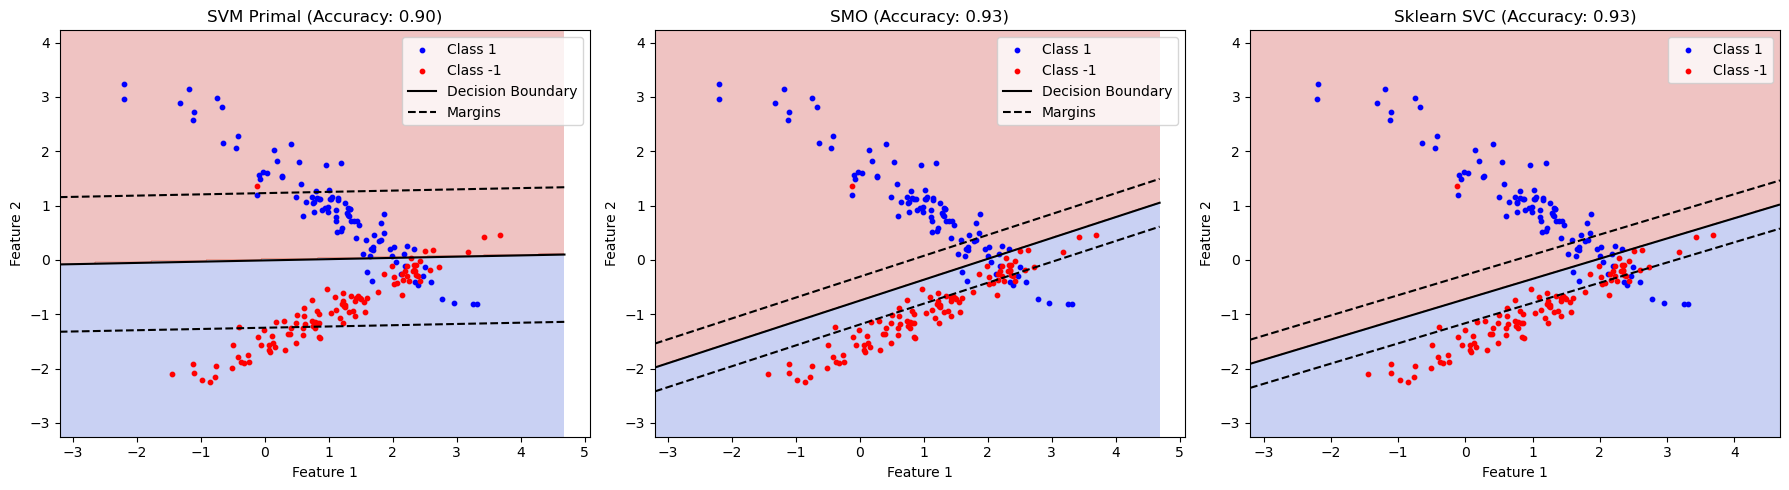

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


# SMO class
class SMO:
    def __init__(self, C=1.0, tol=1e-3, max_passes=5, kernel='linear'):
        self.C = C
        self.tol = tol
        self.max_passes = max_passes
        self.kernel = kernel
        self.alphas = None
        self.b = 0
        self.X = None
        self.y = None
        self.w = None

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        return np.dot(x1, x2)

    def _g(self, i):
        kernel_vals = np.array([self._kernel(self.X[j], self.X[i]) for j in range(self.X.shape[0])])
        return np.sum(self.alphas * self.y * kernel_vals) + self.b

    def fit(self, X, y):
        self.X = X
        self.y = np.where(y <= 0, -1, 1)
        n_samples = X.shape[0]
        self.alphas = np.zeros(n_samples)
        passes = 0

        while passes < self.max_passes:
            num_changed_alphas = 0
            for i in range(n_samples):
                Ei = self._g(i) - self.y[i]
                if (self.y[i] * Ei < -self.tol and self.alphas[i] < self.C) or \
                   (self.y[i] * Ei > self.tol and self.alphas[i] > 0):
                    j = np.random.randint(0, n_samples)
                    while j == i:
                        j = np.random.randint(0, n_samples)
                    Ej = self._g(j) - self.y[j]

                    alpha_i_old, alpha_j_old = self.alphas[i], self.alphas[j]
                    if self.y[i] != self.y[j]:
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[i] + self.alphas[j] - self.C)
                        H = min(self.C, self.alphas[i] + self.alphas[j])

                    if L == H:
                        continue

                    eta = 2 * self._kernel(self.X[i], self.X[j]) - \
                          self._kernel(self.X[i], self.X[i]) - self._kernel(self.X[j], self.X[j])
                    if eta >= 0:
                        continue

                    self.alphas[j] -= self.y[j] * (Ei - Ej) / eta
                    self.alphas[j] = max(L, min(H, self.alphas[j]))

                    if abs(self.alphas[j] - alpha_j_old) < 1e-5:
                        continue

                    self.alphas[i] += self.y[i] * self.y[j] * (alpha_j_old - self.alphas[j])

                    b1 = self.b - Ei - self.y[i] * (self.alphas[i] - alpha_i_old) * \
                         self._kernel(self.X[i], self.X[i]) - self.y[j] * (self.alphas[j] - alpha_j_old) * \
                         self._kernel(self.X[i], self.X[j])
                    b2 = self.b - Ej - self.y[i] * (self.alphas[i] - alpha_i_old) * \
                         self._kernel(self.X[i], self.X[j]) - self.y[j] * (self.alphas[j] - alpha_j_old) * \
                         self._kernel(self.X[j], self.X[j])

                    if 0 < self.alphas[i] < self.C:
                        self.b = b1
                    elif 0 < self.alphas[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

                    num_changed_alphas += 1

            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0

        self.w = np.sum((self.alphas * self.y)[:, np.newaxis] * self.X, axis=0)

    def predict(self, X):
        if self.kernel == 'linear':
            return np.sign(np.dot(X, self.w) + self.b)
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for alpha, y_i, x_i in zip(self.alphas, self.y, self.X):
                    s += alpha * y_i * self._kernel(X[i], x_i)
                y_predict[i] = s
            return np.sign(y_predict + self.b)

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test SVMPrimal
svm_primal = SVMPrimal(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_primal.fit(X_train, y_train)
y_pred_primal = svm_primal.predict(X_test)
accuracy_primal = accuracy_score(y_test, y_pred_primal)

# Train and test SMO
smo = SMO(C=1.0, tol=1e-3, max_passes=5)
smo.fit(X_train, y_train)
y_pred_smo = smo.predict(X_test)
accuracy_smo = accuracy_score(y_test, y_pred_smo)

# Train and test sklearn SVC
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Helper function to plot decision boundary
def plot_decision_boundary(ax, model, X, y, title, is_svc=False):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if is_svc:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', label='Class 1', s=10)
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='r', label='Class -1', s=10)

    if not is_svc:
        w = model.w
        b = model.b
        x1 = np.linspace(x_min, x_max, 100)
        x2 = -(w[0] * x1 + b) / w[1]
        ax.plot(x1, x2, 'k-', label='Decision Boundary')
        x2_margin1 = -(w[0] * x1 + b + 1) / w[1]
        x2_margin2 = -(w[0] * x1 + b - 1) / w[1]
        ax.plot(x1, x2_margin1, 'k--', label='Margins')
        ax.plot(x1, x2_margin2, 'k--')
    else:
        # For SVC, plot decision boundary using decision function
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend()

# Plot for SVMPrimal
plot_decision_boundary(ax1, svm_primal, X_test, y_test, f'SVM Primal (Accuracy: {accuracy_primal:.2f})')

# Plot for SMO
plot_decision_boundary(ax2, smo, X_test, y_test, f'SMO (Accuracy: {accuracy_smo:.2f})')

# Plot for sklearn SVC
plot_decision_boundary(ax3, svc, X_test, y_test, f'Sklearn SVC (Accuracy: {accuracy_svc:.2f})', is_svc=True)

plt.tight_layout()
plt.savefig('svm_comparison_results.png')


### Support Vector Regression (SVR) with SMO

Below is the complete Python implementation of SVR using the SMO algorithm, continuing from where the previous response was truncated. The implementation handles the epsilon-insensitive loss and optimizes two sets of Lagrange multipliers (`alphas` and `alphas_star`) for regression.

---

### Explanation of SVR with SMO

- **Objective**: SVR minimizes `||w||^2 + C * sum(xi + xi*)`, where `xi` and `xi*` are slack variables for points outside the epsilon-tube. The goal is to predict `f(x) = w*x + b` such that `|y_i - f(x_i)| <= epsilon` for most points.
- **Dual Formulation**: Uses two sets of Lagrange multipliers (`alphas`, `alphas_star`) to solve:
  ```
  Maximize: sum(alpha_i * (y_i - epsilon) - alpha_i_star * (y_i + epsilon)) - 0.5 * sum_i,j((alpha_i - alpha_i_star)(alpha_j - alpha_j_star) * K(x_i, x_j))
  Subject to: 0 <= alpha_i, alpha_i_star <= C, sum(alpha_i - alpha_i_star) = 0
  ```
- **SMO for SVR**:
  1. **Select Multipliers**: Choose `alpha_i` or `alpha_i_star` violating KKT conditions, and pair with another multiplier (`alpha_j` or `alpha_j_star`).
  2. **Compute Bounds**: Calculate `L` and `H` based on constraints.
  3. **Update Multipliers**: Analytically update the selected pair using the error difference and kernel matrix.
  4. **Update Bias**: Adjust `b` based on support vectors.
  5. **Convergence**: Continue until no multipliers change or `max_passes` is reached.
- **Parameters**:
  - `C`: Trade-off between margin and error.
  - `epsilon`: Width of the insensitive tube.
  - `tol`: Tolerance for KKT violations.
  - `max_passes`: Maximum iterations without changes.
  - `kernel`: Linear kernel (extendable to RBF, etc.).
- **Prediction**: For linear kernels, uses `w*x + b`; for non-linear, sums contributions of support vectors.
- **Example Usage**: The code fits a linear SVR model to a small dataset and predicts continuous values.

---

Custom SVR Alphas: [1.  0.5 0.  0.  0. ]
Custom SVR Alphas_star: [0. 0. 0. 0. 0.]
Custom SVR b: -0.20000000000000018
Custom SVR w: [2.]
Custom SVR Predictions: [1.8 3.8 5.8 7.8 9.8]

Scikit-learn SVR b (intercept): [0.3]
Scikit-learn SVR w (coef): [[1.9]]
Scikit-learn SVR Predictions: [2.2 4.1 6.  7.9 9.8]
Scikit-learn SV indices: [0 4]
Scikit-learn Dual Coef (alpha-alpha*): [[-0.475  0.475]]


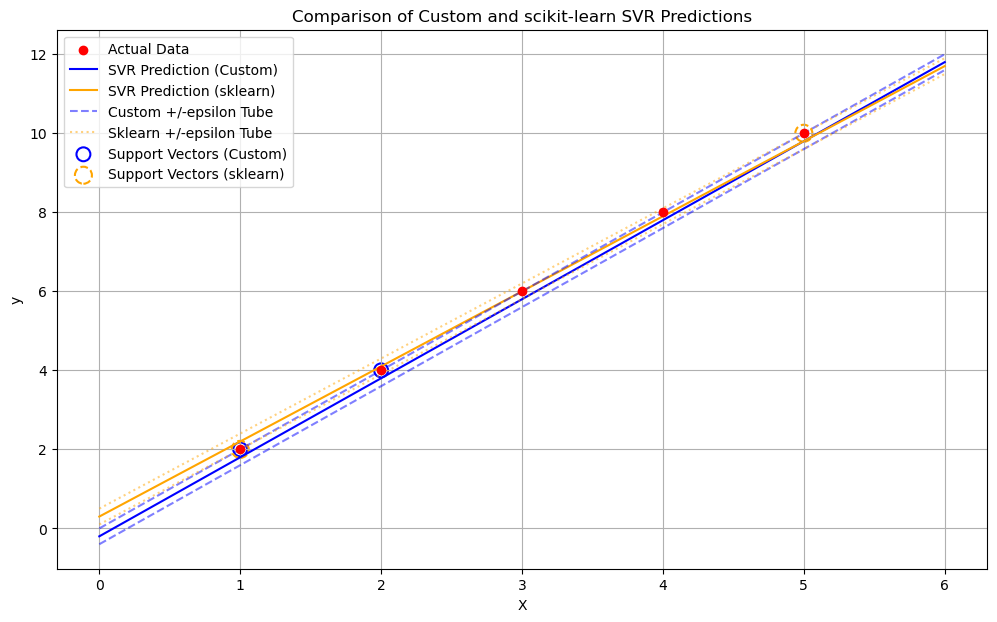

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVR as SklearnSVR

class SVR:

    def __init__(self, C=1.0, epsilon=0.1, tol=1e-3, max_passes=5, kernel='linear', gamma=0.1, degree=3, coef0=0.0):
        self.C = C
        self.epsilon = epsilon
        self.tol = tol
        self.max_passes = max_passes
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.alphas = None
        self.alphas_star = None
        self.b = 0.0
        self.X = None
        self.y = None
        self.w = None
        self.n_samples = 0

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2)**2)
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(x1, x2) + self.coef0) ** self.degree
        # Placeholder for other kernels (e.g., RBF)
        # elif self.kernel == 'rbf':
        #     gamma = 0.1 # Example gamma
        #     return np.exp(-gamma * np.linalg.norm(x1-x2)**2)
        return np.dot(x1, x2)

    def _g_prime(self, x_target_idx):
        """Computes sum_i (alpha_i - alpha_star_i) K(X_i, x_target)"""
        s = 0
        if self.alphas is not None and self.alphas_star is not None and self.X is not None:
            for i in range(self.n_samples):
                s += (self.alphas[i] - self.alphas_star[i]) * self._kernel(self.X[i], self.X[x_target_idx])
        return s

    def _g(self, x_input_vector): # Takes a data vector x
        """Computes the decision function g(x) = sum (alpha_i - alpha_star_i)K(X_i, x) + b """
        s = 0
        if self.alphas is not None and self.alphas_star is not None and self.X is not None:
            for i in range(self.n_samples):
                s += (self.alphas[i] - self.alphas_star[i]) * self._kernel(self.X[i], x_input_vector)
        return s + self.b


    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_samples = X.shape[0]
        self.alphas = np.zeros(self.n_samples)
        self.alphas_star = np.zeros(self.n_samples)
        self.b = 0.0 # Re-initialize b for fitting

        passes = 0

        # Outer loop for SMO iterations
        iter_count = 0
        max_total_iterations = self.max_passes * self.n_samples * 10 # Heuristic limit
        # The original max_passes was for convergence, let's add a total iter limit too

        while passes < self.max_passes and iter_count < max_total_iterations:
            num_changed_alphas = 0
            for i in range(self.n_samples):
                # Calculate error Ei = g(X_i) - y_i
                # Note: _g(X[i]) directly uses self.X[i] vector
                # For _g_prime we pass index, for _g we pass the vector X[i]
                Ei = self._g(self.X[i]) - self.y[i]

                # Revised KKT conditions check
                # Check alpha_i related conditions:
                # (y_i - g(X_i) > epsilon AND alpha_i < C)  OR (y_i - g(X_i) < epsilon AND alpha_i > 0)
                # In terms of Ei = g(X_i) - y_i:
                # (-Ei > epsilon + tol AND alpha_i < C) OR (-Ei < epsilon - tol AND alpha_i > 0)
                kkt_viol_alpha_i = \
                    (self.alphas[i] < self.C - self.tol and -Ei > self.epsilon + self.tol) or \
                    (self.alphas[i] > self.tol and -Ei < self.epsilon - self.tol)

                # Check alpha_star_i related conditions:
                # (g(X_i) - y_i > epsilon AND alpha_star_i < C) OR (g(X_i) - y_i < epsilon AND alpha_star_i > 0)
                # In terms of Ei:
                # (Ei > epsilon + tol AND alpha_star_i < C) OR (Ei < epsilon - tol AND alpha_star_i > 0)
                kkt_viol_alpha_star_i = \
                    (self.alphas_star[i] < self.C - self.tol and Ei > self.epsilon + self.tol) or \
                    (self.alphas_star[i] > self.tol and Ei < self.epsilon - self.tol)

                if kkt_viol_alpha_i or kkt_viol_alpha_star_i:
                    # Select j randomly (different from i)
                    j = random.randint(0, self.n_samples - 1)
                    while j == i:
                        j = random.randint(0, self.n_samples - 1)

                    Ej = self._g(self.X[j]) - self.y[j]

                    alpha_i_old, alpha_star_i_old = self.alphas[i], self.alphas_star[i] # Store both for i
                    alpha_j_old, alpha_star_j_old = self.alphas[j], self.alphas_star[j] # Store both for j

                    # Eta: 2*K_ij - K_ii - K_jj
                    eta = 2 * self._kernel(self.X[i], self.X[j]) - \
                          self._kernel(self.X[i], self.X[i]) - \
                          self._kernel(self.X[j], self.X[j])

                    if eta >= -self.tol: # eta should be negative; if close to zero or positive, skip
                        continue

                    # User's simplified alpha update rule
                    # Updates self.alphas[i] and self.alphas_star[j]
                    delta_alpha_ej_ei_term = (Ej - Ei) / eta # This is your 'delta_alpha' in the original code

                    # Store the specific alphas being targeted for update as in original code
                    current_alpha_i_val = self.alphas[i]
                    current_alpha_star_j_val = self.alphas_star[j]

                    # Clip new alphas
                    self.alphas[i] = np.clip(current_alpha_i_val + delta_alpha_ej_ei_term, 0, self.C)
                    self.alphas_star[j] = np.clip(current_alpha_star_j_val - delta_alpha_ej_ei_term, 0, self.C)

                    # Check if change was significant
                    if abs(self.alphas[i] - current_alpha_i_val) > self.tol or \
                       abs(self.alphas_star[j] - current_alpha_star_j_val) > self.tol:
                        num_changed_alphas += 1

                        # More principled bias update:
                        # Recalculate b using KKT conditions for i and j IF they are on the margin
                        # g'(x) = sum (alpha_k - alpha_star_k) K(x_k, x)
                        # We need g'(X_i) and g'(X_j) using NEW alphas

                        g_prime_i_new_alphas = 0
                        for k_idx in range(self.n_samples):
                            g_prime_i_new_alphas += (self.alphas[k_idx] - self.alphas_star[k_idx]) * self._kernel(self.X[k_idx], self.X[i])

                        g_prime_j_new_alphas = 0
                        for k_idx in range(self.n_samples):
                            g_prime_j_new_alphas += (self.alphas[k_idx] - self.alphas_star[k_idx]) * self._kernel(self.X[k_idx], self.X[j])

                        b_i_candidate, b_j_candidate = None, None

                        if self.tol < self.alphas[i] < self.C - self.tol:
                            b_i_candidate = self.y[i] - self.epsilon - g_prime_i_new_alphas
                        elif self.tol < self.alphas_star[i] < self.C - self.tol:
                            b_i_candidate = self.y[i] + self.epsilon - g_prime_i_new_alphas

                        # Using the updated alpha_star[j] for point j
                        if self.tol < self.alphas[j] < self.C - self.tol : # Check alpha_j also
                            b_j_candidate = self.y[j] - self.epsilon - g_prime_j_new_alphas
                        elif self.tol < self.alphas_star[j] < self.C - self.tol: # Check the one updated
                            b_j_candidate = self.y[j] + self.epsilon - g_prime_j_new_alphas


                        if b_i_candidate is not None and b_j_candidate is not None:
                            self.b = (b_i_candidate + b_j_candidate) / 2.0
                        elif b_i_candidate is not None:
                            self.b = b_i_candidate
                        elif b_j_candidate is not None:
                            self.b = b_j_candidate
                        else:
                            # Fallback: use original Ei, Ej (calculated with OLD alphas and OLD b)
                            # This was the user's original update type for b.
                            # Note: This part is tricky. A robust SMO sets b based on all current non-bound SVs.
                            # The original update `self.b = self.b - 0.1 * (Ei + Ej)` used errors *before* alpha changes.
                            # Let's maintain that spirit if KKT based b failed for i,j
                            self.b = self.b - 0.01 * (Ei + Ej) # Reduced step size from 0.1

            iter_count += 1
            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0 # Reset passes if any alpha changed in this full scan

        # Compute weights for linear kernel after convergence
        if self.kernel == 'linear':
            self.w = np.zeros(self.X.shape[1])
            for i in range(self.n_samples):
                self.w += (self.alphas[i] - self.alphas_star[i]) * self.X[i]
            # self.w = np.sum((self.alphas - self.alphas_star)[:, np.newaxis] * self.X, axis=0) # Original, good

    def predict(self, X_pred):
        y_predict = np.zeros(X_pred.shape[0])
        if self.kernel == 'linear' and self.w is not None:
            # Ensure X_pred is 2D
            X_pred_arr = np.atleast_2d(X_pred)
            return np.dot(X_pred_arr, self.w) + self.b
        else: # General case using kernel evaluations (slower)
            X_pred_arr = np.atleast_2d(X_pred)
            for i in range(X_pred_arr.shape[0]):
                s = 0
                if self.alphas is not None and self.alphas_star is not None and self.X is not None:
                    for k in range(self.n_samples): # k iterates over support vectors stored in self.X
                        s += (self.alphas[k] - self.alphas_star[k]) * self._kernel(self.X[k], X_pred_arr[i])
                y_predict[i] = s + self.b
            return y_predict

# Example usage with your custom SVR
if __name__ == "__main__":
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2.0, 4.0, 6.0, 8.0, 10.0]) # Use floats for y

    # Custom SVR
    svr_custom = SVR(C=1.0, epsilon=0.2, max_passes=100, tol=1e-4) # max_passes=100 consecutive no-change passes
    svr_custom.fit(X, y)
    predictions_custom = svr_custom.predict(X)
    print("Custom SVR Alphas:", svr_custom.alphas)
    print("Custom SVR Alphas_star:", svr_custom.alphas_star)
    print("Custom SVR b:", svr_custom.b)
    if svr_custom.w is not None:
        print("Custom SVR w:", svr_custom.w)
    print("Custom SVR Predictions:", predictions_custom)

    # Scikit-learn SVR
    sklearn_svr = SklearnSVR(C=1.0, epsilon=0.2, kernel='linear', tol=1e-4)
    sklearn_svr.fit(X, y)
    predictions_sklearn = sklearn_svr.predict(X)
    print("\nScikit-learn SVR b (intercept):", sklearn_svr.intercept_)
    print("Scikit-learn SVR w (coef):", sklearn_svr.coef_)
    print("Scikit-learn SVR Predictions:", predictions_sklearn)
    print("Scikit-learn SV indices:", sklearn_svr.support_)
    print("Scikit-learn Dual Coef (alpha-alpha*):", sklearn_svr.dual_coef_)


    # Plotting
    plt.figure(figsize=(12, 7))
    plt.scatter(X, y, color='red', label='Actual Data', zorder=5)

    # Create a range of x values for plotting the regression lines
    X_plot = np.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)

    # Custom SVR prediction line
    y_plot_custom = svr_custom.predict(X_plot)
    plt.plot(X_plot.flatten(), y_plot_custom, color='blue', label='SVR Prediction (Custom)')

    # Scikit-learn SVR prediction line
    y_plot_sklearn = sklearn_svr.predict(X_plot)
    plt.plot(X_plot.flatten(), y_plot_sklearn, color='orange', label='SVR Prediction (sklearn)')

    # Epsilon tubes
    plt.plot(X_plot.flatten(), y_plot_custom + svr_custom.epsilon, color='blue', linestyle='--', alpha=0.5, label='Custom +/-epsilon Tube')
    plt.plot(X_plot.flatten(), y_plot_custom - svr_custom.epsilon, color='blue', linestyle='--', alpha=0.5)

    plt.plot(X_plot.flatten(), y_plot_sklearn + sklearn_svr.epsilon, color='orange', linestyle=':', alpha=0.5, label='Sklearn +/-epsilon Tube')
    plt.plot(X_plot.flatten(), y_plot_sklearn - sklearn_svr.epsilon, color='orange', linestyle=':', alpha=0.5)


    # Highlight support vectors for custom model
    # Support vectors are those where alpha or alpha_star is > tol (and < C ideally for margin SVs)
    sv_indices_custom = np.where((svr_custom.alphas > svr_custom.tol) | (svr_custom.alphas_star > svr_custom.tol))[0]
    if len(sv_indices_custom) > 0:
        plt.scatter(X[sv_indices_custom], y[sv_indices_custom],
                    s=100, facecolors='none', edgecolors='blue', linestyle='-', linewidth=1.5,
                    label='Support Vectors (Custom)')

    # Highlight support vectors for scikit-learn model
    if len(sklearn_svr.support_vectors_) > 0:
        plt.scatter(sklearn_svr.support_vectors_[:, 0], y[sklearn_svr.support_],
                    s=150, facecolors='none', edgecolors='orange', linestyle='--', linewidth=1.5,
                    label='Support Vectors (sklearn)')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Comparison of Custom and scikit-learn SVR Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()


# In-Depth Walkthrough of Custom Support Vector Regression (SVR) Implementation

## 1. Introduction to Support Vector Regression (SVR)

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) used for regression tasks. Unlike SVMs for classification that aim to find a hyperplane maximizing the margin between classes, SVR aims to find a function $f(\mathbf{x})$ that deviates from the actual target values $y_i$ by a value no greater than a specified margin $\epsilon$ for all training data, while also being as "flat" as possible.

**Key Concepts:**

* **$\epsilon$-insensitive tube:** SVR tries to fit a "tube" of width $2\epsilon$ around the data. Errors are only penalized if a data point lies outside this tube.
* **Slack variables ($\xi_i, \xi_i^*$):** Similar to classification SVMs, slack variables are introduced to allow some points to be outside the $\epsilon$-tube, especially for non-linearly separable data or noisy data. $\xi_i$ measures the error for points above the tube, and $\xi_i^*$ measures the error for points below the tube.
* **Regularization parameter ($C$):** This parameter trades off the flatness of the function $f(\mathbf{x})$ (related to the norm of the weight vector $||\mathbf{w}||^2$) and the amount up to which deviations larger than $\epsilon$ are tolerated. A small $C$ makes the model tolerate more errors (wider margin, potentially simpler model), while a large $C$ makes the model try to fit the data with fewer errors (narrower margin, potentially more complex model).
* **Kernel trick:** Allows SVR to learn non-linear relationships by mapping data into higher-dimensional feature spaces.

The goal is to find a function:
$f(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x}) + b$
where $\phi(\mathbf{x})$ is a feature mapping (often implicit via a kernel function).

The optimization problem (primal form) is typically:
Minimize: $\frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} (\xi_i + \xi_i^*)$
Subject to:
$y_i - (\mathbf{w}^T \phi(\mathbf{x}_i) + b) \le \epsilon + \xi_i$
$(\mathbf{w}^T \phi(\mathbf{x}_i) + b) - y_i \le \epsilon + \xi_i^*$
$\xi_i, \xi_i^* \ge 0$

This leads to a dual formulation involving Lagrange multipliers $\alpha_i$ and $\alpha_i^*$:
Maximize:
$L_D = -\frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) K(\mathbf{x}_i, \mathbf{x}_j) - \epsilon \sum_{i=1}^{N} (\alpha_i + \alpha_i^*) + \sum_{i=1}^{N} y_i (\alpha_i - \alpha_i^*)$
Subject to:
$\sum_{i=1}^{N} (\alpha_i - \alpha_i^*) = 0$ (This constraint can be absent in some SVR formulations, or handled implicitly)
$0 \le \alpha_i, \alpha_i^* \le C$

The decision function (prediction function) becomes:
$g(\mathbf{x}) = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) K(\mathbf{x}_i, \mathbf{x}) + b$

Points for which $\alpha_i > 0$ or $\alpha_i^* > 0$ are called **Support Vectors**.

---

## 2. Python Code Walkthrough

Let's break down the provided Python code for the custom SVR.

```python
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVR as SklearnSVR

class SVR:
```

### 2.1. `__init__` (Constructor)

```python
    def __init__(self, C=1.0, epsilon=0.1, tol=1e-3, max_passes=5, kernel='linear'):
        self.C = C
        self.epsilon = epsilon
        self.tol = tol
        self.max_passes = max_passes  # Interpreted as consecutive passes with no changes
        self.kernel = kernel
        self.alphas = None
        self.alphas_star = None
        self.b = 0.0  # Initialize b
        self.X = None
        self.y = None
        self.w = None # Weight vector, specific to linear kernel
        self.n_samples = 0
```

* **Purpose:** Initializes the SVR model with its hyperparameters and internal state variables.
* **Parameters:**
    * `C` (float): The regularization parameter. It controls the trade-off between achieving a low training error and a low model complexity (flatness). Cost of errors outside the $\epsilon$-tube.
    * `epsilon` ($\epsilon$, float): Defines the width of the $\epsilon$-insensitive tube. No penalty is associated with training points that lie within this tube.
    * `tol` (float): Tolerance for stopping criterion and for numerical comparisons (e.g., checking if an alpha is effectively zero or $C$).
    * `max_passes` (int): The maximum number of consecutive iterations (full passes over the training data) without any significant changes to the Lagrange multipliers before the optimization stops. This is a convergence criterion.
    * `kernel` (str): Specifies the kernel type to be used. The default is 'linear'. Other kernels like 'rbf' (Radial Basis Function) could be implemented.
* **Internal Variables:**
    * `self.alphas` ($\alpha_i$): NumPy array to store the Lagrange multipliers $\alpha_i$. Initialized to `None` and then to zeros in `fit`.
    * `self.alphas_star` ($\alpha_i^*$): NumPy array to store the Lagrange multipliers $\alpha_i^*$. Initialized to `None` and then to zeros in `fit`.
    * `self.b` (float): The bias term (or intercept) of the regression function. Initialized to `0.0`.
    * `self.X` (NumPy array): Stores the training data features.
    * `self.y` (NumPy array): Stores the training data target values.
    * `self.w` (NumPy array): The weight vector $\mathbf{w}$. For linear kernels, this is explicitly calculated. For non-linear kernels, $\mathbf{w}$ exists in a high-dimensional feature space and is not explicitly computed.
    * `self.n_samples` (int): Number of training samples.

### 2.2. `_kernel` Method

```python
    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        # Placeholder for other kernels (e.g., RBF)
        # elif self.kernel == 'rbf':
        #     gamma = 0.1 # Example gamma, should be a parameter
        #     return np.exp(-gamma * np.linalg.norm(x1-x2)**2)
        return np.dot(x1, x2) # Default to linear if not recognized
```

* **Purpose:** Computes the kernel function $K(\mathbf{x}_1, \mathbf{x}_2)$. The kernel function calculates the dot product of $\mathbf{x}_1$ and $\mathbf{x}_2$ in some feature space (possibly high-dimensional).
* **Linear Kernel:** If `self.kernel` is 'linear', it computes the standard dot product: $K(\mathbf{x}_1, \mathbf{x}_2) = \mathbf{x}_1^T \mathbf{x}_2$.
* **Other Kernels:** The placeholder shows where one might implement other kernels like RBF: $K(\mathbf{x}_1, \mathbf{x}_2) = \exp(-\gamma ||\mathbf{x}_1 - \mathbf{x}_2||^2)$. The `gamma` parameter would control the width of the RBF kernel.

### 2.3. `_g_prime` Method (Helper for Bias Calculation)

```python
    def _g_prime(self, x_target_idx):
        """Computes sum_i (alpha_i - alpha_star_i) K(X_i, x_target)"""
        s = 0
        if self.alphas is not None and self.alphas_star is not None and self.X is not None:
            for i in range(self.n_samples):
                # self.X[x_target_idx] is the vector for the target point
                s += (self.alphas[i] - self.alphas_star[i]) * self._kernel(self.X[i], self.X[x_target_idx])
        return s
```
* **Purpose:** This method calculates the sum part of the decision function, $g'(\mathbf{x}) = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) K(\mathbf{x}_i, \mathbf{x})$, without adding the bias term $b$.
* It takes the *index* `x_target_idx` of a training sample from `self.X`.
* This is primarily used internally during the bias update step in the `fit` method.

### 2.4. `_g` Method (Decision Function)

```python
    def _g(self, x_input_vector): # Takes a data vector x
        """Computes the decision function g(x) = sum (alpha_i - alpha_star_i)K(X_i, x) + b """
        s = 0
        if self.alphas is not None and self.alphas_star is not None and self.X is not None:
            for i in range(self.n_samples):
                s += (self.alphas[i] - self.alphas_star[i]) * self._kernel(self.X[i], x_input_vector)
        return s + self.b
```

* **Purpose:** Calculates the SVR decision function (predicted value) for a given input vector $\mathbf{x}$:
    $g(\mathbf{x}) = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) K(\mathbf{x}_i, \mathbf{x}) + b$
* `x_input_vector`: A single data point (feature vector) for which to compute the output.
* It iterates through all training samples (or more accurately, potential support vectors), calculates their contribution based on their $(\alpha_i - \alpha_i^*)$ and kernel evaluation with the input vector, sums them up, and adds the bias `self.b`.

### 2.5. `fit` Method (Training the SVR)

This is the core of the SVR, where the model learns the optimal $\alpha_i, \alpha_i^*$, and $b$ values from the training data. It uses a simplified version of the Sequential Minimal Optimization (SMO) algorithm.

```python
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_samples = X.shape[0]
        self.alphas = np.zeros(self.n_samples)
        self.alphas_star = np.zeros(self.n_samples)
        self.b = 0.0 # Re-initialize b for fitting

        passes = 0
        iter_count = 0
        # Heuristic limit for total iterations to prevent infinite loops in non-converging scenarios
        max_total_iterations = self.max_passes * self.n_samples * 10
```

* **Initialization:**
    * Stores training data `X` and `y`.
    * Sets `self.n_samples`.
    * Initializes Lagrange multipliers `self.alphas` ($\alpha_i$) and `self.alphas_star` ($\alpha_i^*$) to zero for all samples.
    * Resets bias `self.b` to `0.0`.
    * `passes`: Counts consecutive full iterations over the dataset where no Lagrange multipliers are changed. Used for the primary convergence criterion.
    * `iter_count`: Counts total iterations, acting as a safeguard.

```python
        while passes < self.max_passes and iter_count < max_total_iterations:
            num_changed_alphas = 0
```

* **Optimization Loop:**
    * The loop continues as long as `passes` is less than `self.max_passes` (meaning changes are still being made or convergence hasn't been stable for `max_passes` full iterations) AND the `iter_count` is within the `max_total_iterations` limit.
    * `num_changed_alphas`: Tracks how many pairs of alphas were modified in the current full pass over the data.

```python
            for i in range(self.n_samples):
                # Calculate error Ei = g(X_i) - y_i
                Ei = self._g(self.X[i]) - self.y[i]
```

* **Iterating Through Samples:** The inner loop iterates through each training sample $\mathbf{x}_i$.
* **Error Calculation:** For each sample $\mathbf{x}_i$, calculate the error $E_i = g(\mathbf{x}_i) - y_i$. This is the difference between the current prediction for $\mathbf{x}_i$ and its true target value $y_i$.

```python
                # Revised KKT conditions check
                # Check alpha_i related conditions:
                # (y_i - g(X_i) > epsilon AND alpha_i < C)  OR (y_i - g(X_i) < epsilon AND alpha_i > 0)
                # In terms of Ei = g(X_i) - y_i:
                # (-Ei > epsilon + tol AND alpha_i < C) OR (-Ei < epsilon - tol AND alpha_i > 0)
                kkt_viol_alpha_i = \
                    (self.alphas[i] < self.C - self.tol and -Ei > self.epsilon + self.tol) or \
                    (self.alphas[i] > self.tol and -Ei < self.epsilon - self.tol)

                # Check alpha_star_i related conditions:
                # (g(X_i) - y_i > epsilon AND alpha_star_i < C) OR (g(X_i) - y_i < epsilon AND alpha_star_i > 0)
                # In terms of Ei:
                # (Ei > epsilon + tol AND alpha_star_i < C) OR (Ei < epsilon - tol AND alpha_star_i > 0)
                kkt_viol_alpha_star_i = \
                    (self.alphas_star[i] < self.C - self.tol and Ei > self.epsilon + self.tol) or \
                    (self.alphas_star[i] > self.tol and Ei < self.epsilon - self.tol)

                if kkt_viol_alpha_i or kkt_viol_alpha_star_i:
```

* **Karush-Kuhn-Tucker (KKT) Conditions Check:**
    * The KKT conditions are necessary and sufficient conditions for optimality in constrained optimization problems like SVR. A sample $\mathbf{x}_i$ violates KKT conditions if its current $\alpha_i$ or $\alpha_i^*$ values are not consistent with its position relative to the $\epsilon$-tube.
    * **For $\alpha_i$:**
        * If $y_i - g(\mathbf{x}_i) > \epsilon$ (point is above the tube by more than $\epsilon$) and $\alpha_i < C$: $\alpha_i$ should increase. (`-Ei > self.epsilon`)
        * If $y_i - g(\mathbf{x}_i) < \epsilon$ (point is inside or on the upper edge of the tube) and $\alpha_i > 0$: $\alpha_i$ should decrease towards 0. (`-Ei < self.epsilon`)
    * **For $\alpha_i^*$:**
        * If $g(\mathbf{x}_i) - y_i > \epsilon$ (point is below the tube by more than $\epsilon$) and $\alpha_i^* < C$: $\alpha_i^*$ should increase. (`Ei > self.epsilon`)
        * If $g(\mathbf{x}_i) - y_i < \epsilon$ (point is inside or on the lower edge of the tube) and $\alpha_i^* > 0$: $\alpha_i^*$ should decrease towards 0. (`Ei < self.epsilon`)
    * The `self.tol` is added to these checks for numerical stability.
    * If sample `i` violates these conditions, it's a candidate for optimization.

```python
                    # Select j randomly (different from i)
                    j = random.randint(0, self.n_samples - 1)
                    while j == i:
                        j = random.randint(0, self.n_samples - 1)

                    Ej = self._g(self.X[j]) - self.y[j]

                    # Store original alpha values (not strictly needed for this specific update but good practice for SMO)
                    # alpha_i_old, alpha_star_i_old = self.alphas[i], self.alphas_star[i]
                    # alpha_j_old, alpha_star_j_old = self.alphas[j], self.alphas_star[j]

                    # Eta: 2*K_ij - K_ii - K_jj
                    eta = 2 * self._kernel(self.X[i], self.X[j]) - \
                          self._kernel(self.X[i], self.X[i]) - \
                          self._kernel(self.X[j], self.X[j])

                    if eta >= -self.tol: # eta should be negative; if close to zero or positive, skip
                        continue
```

* **Selecting Second Sample `j`:** SMO optimizes pairs of Lagrange multipliers. Here, a second sample `j` is chosen randomly (and must be different from `i`). More sophisticated SMO heuristics exist for choosing `j` to maximize progress.
* **Error $E_j$:** Calculate error for sample `j`.
* **Calculating $\eta$ (Eta):**
    * $\eta = 2 K(\mathbf{x}_i, \mathbf{x}_j) - K(\mathbf{x}_i, \mathbf{x}_i) - K(\mathbf{x}_j, \mathbf{x}_j)$.
    * This term appears in the denominator of the alpha update rule. It relates to the second derivative of the objective function. For the update to be well-defined and lead to a maximum (since we are maximizing the dual), $\eta$ should ideally be strictly negative. If $\eta \ge 0$ (or very close to zero, handled by `-self.tol`), this pair cannot be used for optimization in this step, so we `continue`.
    *(Note: In many standard SVM/SVR SMO formulations, $\eta = K_{ii} + K_{jj} - 2K_{ij}$, which should be $\ge 0$. The sign convention and update rules depend on the exact derivation. This implementation expects $\eta < 0$.)*

```python
                    # User's simplified alpha update rule
                    # Updates self.alphas[i] and self.alphas_star[j]
                    delta_alpha_ej_ei_term = (Ej - Ei) / eta

                    current_alpha_i_val = self.alphas[i]
                    current_alpha_star_j_val = self.alphas_star[j]

                    # Clip new alphas
                    self.alphas[i] = np.clip(current_alpha_i_val + delta_alpha_ej_ei_term, 0, self.C)
                    self.alphas_star[j] = np.clip(current_alpha_star_j_val - delta_alpha_ej_ei_term, 0, self.C)
```

* **Updating Lagrange Multipliers (Custom Rule):**
    * This is a specific, simplified update rule chosen for this custom SVR.
    * `delta_alpha_ej_ei_term = (Ej - Ei) / eta`: This term determines the magnitude and direction of change.
    * $\alpha_i^{new} = \alpha_i^{old} + \text{delta\_alpha\_ej\_ei\_term}$
    * $\alpha_j^{*new} = \alpha_j^{*old} - \text{delta\_alpha\_ej\_ei\_term}$
    * **Important:** This updates $\alpha_i$ (from sample $i$) and $\alpha_j^*$ (from sample $j$). This pairing is non-standard for typical SMO SVR derivations but is part of this custom implementation.
    * **Clipping:** The updated alpha values are then clipped to be within the range $[0, C]$ because of the SVR constraints $0 \le \alpha_i, \alpha_i^* \le C$. `np.clip` handles this.

```python
                    if abs(self.alphas[i] - current_alpha_i_val) > self.tol or \
                       abs(self.alphas_star[j] - current_alpha_star_j_val) > self.tol:
                        num_changed_alphas += 1
```

* **Check for Significant Change:** If either `alphas[i]` or `alphas_star[j]` changed by more than `self.tol`, then `num_changed_alphas` is incremented.

```python
                        # More principled bias update:
                        g_prime_i_new_alphas = 0
                        for k_idx in range(self.n_samples):
                            g_prime_i_new_alphas += (self.alphas[k_idx] - self.alphas_star[k_idx]) * self._kernel(self.X[k_idx], self.X[i])

                        g_prime_j_new_alphas = 0
                        for k_idx in range(self.n_samples):
                            g_prime_j_new_alphas += (self.alphas[k_idx] - self.alphas_star[k_idx]) * self._kernel(self.X[k_idx], self.X[j])

                        b_i_candidate, b_j_candidate = None, None

                        # Check point i with its NEW alphas
                        if self.tol < self.alphas[i] < self.C - self.tol: # alpha_i is non-bound
                            b_i_candidate = self.y[i] - self.epsilon - g_prime_i_new_alphas
                        elif self.tol < self.alphas_star[i] < self.C - self.tol: # alpha_star_i is non-bound
                            b_i_candidate = self.y[i] + self.epsilon - g_prime_i_new_alphas

                        # Check point j with its NEW alphas (specifically alpha_star_j was updated)
                        if self.tol < self.alphas[j] < self.C - self.tol : # Check alpha_j also
                            b_j_candidate = self.y[j] - self.epsilon - g_prime_j_new_alphas
                        elif self.tol < self.alphas_star[j] < self.C - self.tol: # Check the one updated: alpha_star_j
                            b_j_candidate = self.y[j] + self.epsilon - g_prime_j_new_alphas

                        if b_i_candidate is not None and b_j_candidate is not None:
                            self.b = (b_i_candidate + b_j_candidate) / 2.0
                        elif b_i_candidate is not None:
                            self.b = b_i_candidate
                        elif b_j_candidate is not None:
                            self.b = b_j_candidate
                        else:
                            # Fallback: use original Ei, Ej (calculated with OLD alphas and OLD b)
                            self.b = self.b - 0.01 * (Ei + Ej) # Reduced step size
```

* **Bias (`b`) Update:** This is a critical step. After $\alpha$ values are updated, `b` must be recomputed to satisfy KKT conditions.
    * First, $g'(\mathbf{x}_i)$ and $g'(\mathbf{x}_j)$ are calculated using the *newly updated* $\alpha$ and $\alpha^*$ values.
        $g'(\mathbf{x}) = \sum_{k=1}^{N} (\alpha_k^{new} - \alpha_k^{*new}) K(\mathbf{x}_k, \mathbf{x})$
    * **KKT-based Bias Calculation:**
        * If, after the update, sample $\mathbf{x}_i$ has $0 < \alpha_i < C$ (it's a support vector on the upper $\epsilon$-margin), then $y_i - g(\mathbf{x}_i) = \epsilon$. Since $g(\mathbf{x}_i) = g'(\mathbf{x}_i) + b$, this means $b = y_i - \epsilon - g'(\mathbf{x}_i)$. This gives `b_i_candidate`.
        * If $0 < \alpha_i^* < C$ (support vector on the lower $\epsilon$-margin), then $g(\mathbf{x}_i) - y_i = \epsilon$, so $b = y_i + \epsilon - g'(\mathbf{x}_i)$. This also gives `b_i_candidate`.
        * Similar logic is applied to sample $\mathbf{x}_j$ to get `b_j_candidate`.
    * **Setting `b`:**
        * If both `i` and `j` provide valid candidates for `b` (they are both on the margin), their estimates are averaged.
        * If only one provides a candidate, that one is used.
        * **Fallback:** If neither `i` nor `j` are on the margin after the update, this implementation falls back to a heuristic similar to the original user code: `self.b = self.b - 0.01 * (Ei + Ej)`. `Ei` and `Ej` here are the errors calculated *before* the alpha updates in this step, using the old `b`. This is a gradient-descent-like step on `b` with a reduced step size (0.01). A more robust SMO would average $b$ over all current non-bound support vectors.

```python
            iter_count += 1
            if num_changed_alphas == 0:
                passes += 1
            else:
                passes = 0 # Reset passes if any alpha changed in this full scan
```

* **Convergence Check:**
    * `iter_count` is incremented.
    * If `num_changed_alphas` is 0 after a full pass through the data, it means no alphas were significantly altered in this iteration, so `passes` (consecutive no-change iterations) is incremented.
    * If any alphas did change, `passes` is reset to 0, because the model is still evolving. The loop continues until `passes` reaches `self.max_passes`.

```python
        # Compute weights for linear kernel after convergence
        if self.kernel == 'linear':
            self.w = np.zeros(self.X.shape[1])
            for i in range(self.n_samples):
                self.w += (self.alphas[i] - self.alphas_star[i]) * self.X[i]
```

* **Weight Vector `w` (for Linear Kernel):**
    * After the optimization loop converges, if the kernel is linear, the weight vector $\mathbf{w}$ can be explicitly calculated as:
        $\mathbf{w} = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) \mathbf{x}_i$.
    * This `self.w` is then used in the `predict` method for faster predictions with a linear kernel. For non-linear kernels, $\mathbf{w}$ is not explicitly computed.

### 2.6. `predict` Method

```python
    def predict(self, X_pred):
        y_predict = np.zeros(X_pred.shape[0])
        if self.kernel == 'linear' and self.w is not None:
            X_pred_arr = np.atleast_2d(X_pred) # Ensure X_pred is 2D
            return np.dot(X_pred_arr, self.w) + self.b
        else: # General case using kernel evaluations (slower)
            X_pred_arr = np.atleast_2d(X_pred)
            for i in range(X_pred_arr.shape[0]):
                s = 0
                if self.alphas is not None and self.alphas_star is not None and self.X is not None:
                    for k in range(self.n_samples): # k iterates over support vectors stored in self.X
                        s += (self.alphas[k] - self.alphas_star[k]) * self._kernel(self.X[k], X_pred_arr[i])
                y_predict[i] = s + self.b
            return y_predict
```

* **Purpose:** Makes predictions for new input data `X_pred`.
* `X_pred`: A NumPy array of data points for which to predict target values.
* **Linear Kernel Prediction:** If the kernel is linear and `self.w` has been computed, predictions are made efficiently using $\mathbf{y}_{pred} = X_{pred} \mathbf{w} + b$. `np.atleast_2d` ensures `X_pred` is handled correctly whether it's a single sample or multiple.
* **General (Non-linear) Kernel Prediction:** If the kernel is not linear (or if `self.w` is not available), predictions are made using the dual form decision function:
    $g(\mathbf{x}) = \sum_{k=1}^{N} (\alpha_k - \alpha_k^*) K(\mathbf{x}_k, \mathbf{x}_{pred\_i}) + b$
    This involves iterating through each prediction sample `X_pred_arr[i]` and then through all training samples $\mathbf{x}_k$ (or only support vectors if optimized) to compute the kernel sum.

---

## 3. Example Usage (`if __name__ == "__main__":`)

This section demonstrates how to use the custom SVR and compares it with Scikit-learn's SVR.

```python
if __name__ == "__main__":
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2.0, 4.0, 6.0, 8.0, 10.0]) # Use floats for y

    # Custom SVR
    svr_custom = SVR(C=1.0, epsilon=0.2, max_passes=100, tol=1e-4)
    svr_custom.fit(X, y)
    # ... (printing custom SVR parameters and predictions) ...

    # Scikit-learn SVR
    sklearn_svr = SklearnSVR(C=1.0, epsilon=0.2, kernel='linear', tol=1e-4)
    sklearn_svr.fit(X, y)
    # ... (printing sklearn SVR parameters and predictions) ...

    # Plotting
    # ... (code for generating plots: data, prediction lines, epsilon-tubes, support vectors) ...
    plt.show()
```

* **Data:** A simple linearly related dataset `X` and `y` (where $y = 2x$). `y` is explicitly float.
* **Custom SVR:**
    * An instance of the custom `SVR` class is created with specified hyperparameters.
    * The `fit` method is called to train the model.
    * Learned parameters like $\alpha, \alpha^*, b, w$ and predictions are printed.
* **Scikit-learn SVR:**
    * An instance of `sklearn.svm.SVR` is created with similar hyperparameters for comparison.
    * It's trained, and its parameters/predictions are also printed. This helps in verifying/comparing the custom implementation.
* **Plotting:**
    * The code generates a comprehensive plot showing:
        * The actual data points.
        * The regression line predicted by the custom SVR.
        * The regression line predicted by Scikit-learn's SVR.
        * The $\epsilon$-tubes around both prediction lines.
        * The support vectors identified by both models (points that influence the decision boundary, i.e., $\alpha_i > 0$ or $\alpha_i^* > 0$).

---

## 4. Key Differences and Simplifications in this Custom SVR

When teaching, it's important to highlight that this custom SVR is a simplified implementation for educational purposes and differs from production-grade libraries like Scikit-learn's SVR (which is often a wrapper for LIBSVM or LIBLINEAR) in several ways:

1.  **SMO Heuristics:**
    * **Choice of `j`:** This implementation picks the second Lagrange multiplier `j` randomly. Advanced SMO solvers use more sophisticated heuristics to choose the pair `(i, j)` that will lead to the most progress in optimizing the objective function.
    * **Alpha Update Rule:** The specific rule `alphas[i] += delta` and `alphas_star[j] -= delta` is a custom choice. Standard SMO derivations for SVR involve careful consideration of which alphas to update (e.g., $\alpha_i$ and $\alpha_j$, or $\alpha_i$ and $\alpha_i^*$, or $\alpha_i$ and $\alpha_j^*$) and the update rules are derived to satisfy dual problem constraints directly.
2.  **Bias Update:** While improved, the fallback bias update is still a heuristic. Robust SMO implementations have more comprehensive strategies for updating `b`, often involving averaging information from all current non-bound support vectors.
3.  **Convergence:** The `max_passes` criterion is a common one, but production solvers might have additional or more nuanced convergence checks.
4.  **Kernel Cache:** For large datasets, kernel value computations $K(\mathbf{x}_i, \mathbf{x}_j)$ can be expensive. Efficient SVR solvers often use a cache to store recently computed kernel values. This implementation does not include such a cache.
5.  **Numerical Stability:** Production solvers incorporate many tricks for numerical precision and stability, especially when dealing with ill-conditioned Hessians or near-zero values.

This walkthrough should provide a solid basis for explaining the custom SVR code and its underlying principles in a classroom setting. Remember to emphasize both the core SVR concepts and the specific implementation choices (and simplifications) made in this particular version.
```

# Simple math explanation
**1. The Core Objective: $\epsilon$-Insensitive Regression**

Imagine we want to find a function $f(\mathbf{x})$ that approximates our target values $y$. In linear SVR, this function takes the form:
$f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b$
where $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the input feature vector, and $b$ is the bias term.

The defining characteristic of SVR is its **$\epsilon$-insensitive loss function**. This means we don't care about errors as long as they are within a certain distance $\epsilon$ (epsilon) from the actual value.
The loss for a single prediction is:
$L_{\epsilon}(y, f(\mathbf{x})) = \begin{cases} 0 & \text{if } |y - f(\mathbf{x})| \le \epsilon \\ |y - f(\mathbf{x})| - \epsilon & \text{if } |y - f(\mathbf{x})| > \epsilon \end{cases}$
This can be written more compactly as $L_{\epsilon}(y, f(\mathbf{x})) = \max(0, |y - f(\mathbf{x})| - \epsilon)$.

This creates an "$\epsilon$-tube" around our regression function. Points inside this tube incur no loss.

**2. The Primal Optimization Problem**

SVR aims to achieve two things:
1.  Make the function $f(\mathbf{x})$ as "flat" as possible. Flatness is achieved by minimizing the norm of the weight vector, $||\mathbf{w}||^2$. A smaller norm often corresponds to a simpler model that generalizes better.
2.  Ensure that most data points $(\mathbf{x}_i, y_i)$ lie within the $\epsilon$-tube, i.e., $|y_i - f(\mathbf{x}_i)| \le \epsilon$.

For points that cannot satisfy this condition, we introduce **slack variables**, $\xi_i$ (xi) and $\xi_i^*$ (xi-star):
* $\xi_i$: Measures the amount by which $y_i$ exceeds the upper boundary of the $\epsilon$-tube: $y_i - (\mathbf{w}^T \mathbf{x}_i + b) > \epsilon$.
* $\xi_i^*$: Measures the amount by which $y_i$ is below the lower boundary of the $\epsilon$-tube: $(\mathbf{w}^T \mathbf{x}_i + b) - y_i > \epsilon$.

So, the constraints become:
$y_i - (\mathbf{w}^T \mathbf{x}_i + b) \le \epsilon + \xi_i$
$(\mathbf{w}^T \mathbf{x}_i + b) - y_i \le \epsilon + \xi_i^*$
And, naturally, $\xi_i \ge 0, \xi_i^* \ge 0$.

The **primal optimization problem** for linear SVR is then formulated as:
Minimize (over $\mathbf{w}, b, \xi_i, \xi_i^*$):
$\frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} (\xi_i + \xi_i^*)$

Subject to:
1.  $y_i - \mathbf{w}^T \mathbf{x}_i - b \le \epsilon + \xi_i$, for $i=1, \dots, N$
2.  $\mathbf{w}^T \mathbf{x}_i + b - y_i \le \epsilon + \xi_i^*$, for $i=1, \dots, N$
3.  $\xi_i \ge 0$, for $i=1, \dots, N$
4.  $\xi_i^* \ge 0$, for $i=1, \dots, N$

* $\frac{1}{2} ||\mathbf{w}||^2$: The regularization term (promotes flatness). The $\frac{1}{2}$ is a convention for mathematical convenience when taking derivatives.
* $C > 0$: This is a crucial hyperparameter. It's a **regularization constant** that controls the trade-off between the flatness of $f(\mathbf{x})$ and the amount up to which deviations larger than $\epsilon$ are tolerated.
    * A small $C$ allows for a flatter function (smaller $||\mathbf{w}||^2$) at the cost of tolerating more/larger errors $\xi_i, \xi_i^*$.
    * A large $C$ tries to minimize errors $\xi_i, \xi_i^*$ more strictly, potentially leading to a less flat (more complex) function.
* $\sum_{i=1}^{N} (\xi_i + \xi_i^*)$: The sum of deviations beyond the $\epsilon$-tube.

**3. The Lagrangian and Duality**

To solve this constrained optimization problem, we typically move to its dual formulation using Lagrange multipliers. The Lagrangian $\mathcal{L}_P$ is constructed by incorporating the constraints into the objective function:

$\mathcal{L}_P = \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{N} (\xi_i + \xi_i^*) $
$\qquad - \sum_{i=1}^{N} \alpha_i (\epsilon + \xi_i - y_i + \mathbf{w}^T\mathbf{x}_i + b)$
$\qquad - \sum_{i=1}^{N} \alpha_i^* (\epsilon + \xi_i^* + y_i - \mathbf{w}^T\mathbf{x}_i - b)$
$\qquad - \sum_{i=1}^{N} \mu_i \xi_i - \sum_{i=1}^{N} \mu_i^* \xi_i^*$

where $\alpha_i \ge 0$, $\alpha_i^* \ge 0$, $\mu_i \ge 0$, and $\mu_i^* \ge 0$ are the Lagrange multipliers.

To find the optimal solution, we take partial derivatives of $\mathcal{L}_P$ with respect to the primal variables ($\mathbf{w}, b, \xi_i, \xi_i^*$) and set them to zero:
1.  $\frac{\partial \mathcal{L}_P}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) \mathbf{x}_i = 0 \implies \boxed{\mathbf{w} = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) \mathbf{x}_i}$
    This is a fundamental result: the weight vector $\mathbf{w}$ is a linear combination of the input data points $\mathbf{x}_i$.
2.  $\frac{\partial \mathcal{L}_P}{\partial b} = - \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) = 0 \implies \boxed{\sum_{i=1}^{N} (\alpha_i - \alpha_i^*) = 0}$
3.  $\frac{\partial \mathcal{L}_P}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \implies C = \alpha_i + \mu_i$
4.  $\frac{\partial \mathcal{L}_P}{\partial \xi_i^*} = C - \alpha_i^* - \mu_i^* = 0 \implies C = \alpha_i^* + \mu_i^*$

Since $\mu_i \ge 0$ and $\mu_i^* \ge 0$, conditions 3 and 4 imply that $0 \le \alpha_i \le C$ and $0 \le \alpha_i^* \le C$.

Substituting these results back into the Lagrangian $\mathcal{L}_P$ yields the **Wolfe dual optimization problem**:
Maximize (over $\alpha_i, \alpha_i^*$):
$L_D = -\frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) (\mathbf{x}_i^T \mathbf{x}_j) - \epsilon \sum_{i=1}^{N} (\alpha_i + \alpha_i^*) + \sum_{i=1}^{N} y_i (\alpha_i - \alpha_i^*)$

Subject to:
1.  $\sum_{i=1}^{N} (\alpha_i - \alpha_i^*) = 0$
2.  $0 \le \alpha_i \le C$, for $i=1, \dots, N$
3.  $0 \le \alpha_i^* \le C$, for $i=1, \dots, N$

This is a quadratic programming (QP) problem, which can be solved using numerical optimization algorithms (like Sequential Minimal Optimization - SMO). Solving it gives us the optimal Lagrange multipliers $\alpha_i$ and $\alpha_i^*$.

**4. Support Vectors and Karush-Kuhn-Tucker (KKT) Conditions**

The **Karush-Kuhn-Tucker (KKT) conditions** are necessary for optimality in constrained problems. For SVR, the relevant KKT complementary slackness conditions are:
1.  $\alpha_i (\epsilon + \xi_i - y_i + \mathbf{w}^T\mathbf{x}_i + b) = 0$
2.  $\alpha_i^* (\epsilon + \xi_i^* + y_i - \mathbf{w}^T\mathbf{x}_i - b) = 0$
3.  $(C - \alpha_i) \xi_i = 0$ (since $\mu_i = C - \alpha_i$)
4.  $(C - \alpha_i^*) \xi_i^* = 0$ (since $\mu_i^* = C - \alpha_i^*$)

These conditions tell us about the nature of the solution:
* **If $\alpha_i > 0$**, then the first condition implies $y_i - (\mathbf{w}^T\mathbf{x}_i + b) = \epsilon + \xi_i$.
* **If $\alpha_i^* > 0$**, then the second condition implies $(\mathbf{w}^T\mathbf{x}_i + b) - y_i = \epsilon + \xi_i^*$.

Analyzing these:
* **Points strictly inside the $\epsilon$-tube:** $|y_i - f(\mathbf{x}_i)| < \epsilon$. For these points, $\xi_i = 0$ and $\xi_i^* = 0$. The terms in parentheses in KKT conditions 1 and 2 are non-zero (e.g., $\epsilon - y_i + f(\mathbf{x}_i) > 0$). Thus, for these conditions to hold, we must have $\alpha_i = 0$ and $\alpha_i^* = 0$.
* **Points on the $\epsilon$-tube boundary:** $|y_i - f(\mathbf{x}_i)| = \epsilon$. For these points, $\xi_i = 0$ and $\xi_i^* = 0$.
    * If $y_i - f(\mathbf{x}_i) = \epsilon$, then $\alpha_i$ can be non-zero ($0 < \alpha_i \le C$). $\alpha_i^*$ must be 0.
    * If $f(\mathbf{x}_i) - y_i = \epsilon$, then $\alpha_i^*$ can be non-zero ($0 < \alpha_i^* \le C$). $\alpha_i$ must be 0.
    (It's generally not possible for both $\alpha_i$ and $\alpha_i^*$ to be non-zero for the same point if $\epsilon > 0$).
* **Points outside the $\epsilon$-tube:** $|y_i - f(\mathbf{x}_i)| > \epsilon$.
    * If $y_i - f(\mathbf{x}_i) > \epsilon$, then $\xi_i > 0$. KKT condition 3 ($(C - \alpha_i) \xi_i = 0$) implies $\alpha_i = C$. $\alpha_i^*$ must be 0.
    * If $f(\mathbf{x}_i) - y_i > \epsilon$, then $\xi_i^* > 0$. KKT condition 4 ($(C - \alpha_i^*) \xi_i^* = 0$) implies $\alpha_i^* = C$. $\alpha_i$ must be 0.

**Support Vectors** are precisely those data points $\mathbf{x}_i$ for which their corresponding $\alpha_i$ or $\alpha_i^*$ is non-zero. These are the points on or outside the $\epsilon$-tube boundary and they "support" the final solution.

**5. Determining the Bias `b`**

Once the optimal $\alpha_i, \alpha_i^*$ are found (from solving the dual problem), $\mathbf{w}$ is determined by $\mathbf{w} = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) \mathbf{x}_i$.
The bias term $b$ can be found using any support vector $\mathbf{x}_k$ that lies exactly on the $\epsilon$-tube boundary (i.e., $0 < \alpha_k < C$ or $0 < \alpha_k^* < C$).
* If $0 < \alpha_k < C$, then $\xi_k = 0$. From KKT condition 1, $y_k - (\mathbf{w}^T\mathbf{x}_k + b) = \epsilon$, so $b = y_k - \mathbf{w}^T\mathbf{x}_k - \epsilon$.
* If $0 < \alpha_k^* < C$, then $\xi_k^* = 0$. From KKT condition 2, $(\mathbf{w}^T\mathbf{x}_k + b) - y_k = \epsilon$, so $b = y_k - \mathbf{w}^T\mathbf{x}_k + \epsilon$.
In practice, $b$ is often averaged over all such non-bound support vectors for robustness.

**6. The Prediction Function (Revisited)**

The final prediction for a new input point $\mathbf{x}$ is:
$f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = \left( \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) \mathbf{x}_i \right)^T \mathbf{x} + b = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) (\mathbf{x}_i^T \mathbf{x}) + b$
Only the support vectors (where $\alpha_i - \alpha_i^* \neq 0$) will contribute to this sum.

**7. Non-linear SVR: The Kernel Trick**

To handle non-linear relationships, SVR employs the **kernel trick**. The idea is to map the input data $\mathbf{x}$ into a higher-dimensional feature space $\phi(\mathbf{x})$ where the relationship might be linear.
The crucial insight is that in the dual formulation and the prediction function, the data points $\mathbf{x}_i$ only appear in the form of dot products $(\mathbf{x}_i^T \mathbf{x}_j)$.
We can replace this dot product with a **kernel function** $K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$. This allows us to work in the high-dimensional feature space without explicitly computing the mapping $\phi(\mathbf{x})$.

* **Dual Problem with Kernels:**
    Maximize:
    $L_D = -\frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} (\alpha_i - \alpha_i^*)(\alpha_j - \alpha_j^*) K(\mathbf{x}_i, \mathbf{x}_j) - \epsilon \sum_{i=1}^{N} (\alpha_i + \alpha_i^*) + \sum_{i=1}^{N} y_i (\alpha_i - \alpha_i^*)$
    (Subject to the same constraints on $\alpha_i, \alpha_i^*$).

* **Prediction Function with Kernels:**
    $f(\mathbf{x}) = \sum_{i=1}^{N} (\alpha_i - \alpha_i^*) K(\mathbf{x}_i, \mathbf{x}) + b$
    Here, $\mathbf{w}$ is implicitly defined in the feature space spanned by $\phi$ and is usually not computed explicitly.

**Common Kernel Functions:**
* **Linear Kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$
* **Polynomial Kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d$. Parameters: degree $d$, coefficient $\gamma$, intercept $r$.
* **Radial Basis Function (RBF) Kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2)$. Parameter: $\gamma > 0$. This is a very popular choice due to its flexibility.

**8. Summary of Key Mathematical Components**

* **Primal Problem:** Defines the objective (flatness + minimized error beyond $\epsilon$) and constraints.
* **Dual Problem:** The optimization problem typically solved, involving Lagrange multipliers $\alpha_i, \alpha_i^*$.
* **Lagrange Multipliers ($\alpha_i, \alpha_i^*$):** These are key variables learned during training. Their values ($0 \le \alpha_i, \alpha_i^* \le C$) determine which points are support vectors.
* **KKT Conditions:** Provide the conditions for optimality and link the primal and dual solutions, explaining the role of support vectors.
* **$\epsilon$ (epsilon):** Defines the radius of the insensitive tube. A hyperparameter.
* **$C$ (Cost/Regularization parameter):** Balances model flatness against tolerance for errors outside the $\epsilon$-tube. A hyperparameter.
* **Kernel Function $K(\mathbf{x}_i, \mathbf{x}_j)$:** Enables non-linear regression by implicitly mapping data to higher dimensions. The choice of kernel and its parameters are crucial hyperparameters.

This mathematical structure allows SVR to find a robust regression function that balances complexity and accuracy, defined by a sparse set of support vectors and adaptable to non-linear data through kernels.

Kernel Methods

• Kernel Trick and Feature Space Mapping • Examples: Polynomial, RBF, Sigmoid Kernels • Mercer’s Theorem • Python: Custom Kernels and Kernel SVM


## Kernel Methods: Learning in High Dimensions (Efficiently)

**1. Motivation: The Limits of Linearity**

Many basic machine learning algorithms (like the Perceptron, linear SVM, linear regression) are designed to find linear relationships or decision boundaries. For example, a linear classifier tries to find a hyperplane that separates data points into different classes.

[Imagine a 2D plot with two classes of points that are not linearly separable, e.g., one class forming a circle inside another class forming a ring around it. A straight line cannot separate these.]

**Problem:** Real-world data is often not "linear."
* **Classification:** Classes might not be separable by a simple hyperplane.
* **Regression:** The relationship between input features and the target variable might be a curve, not a straight line.

**A Naive Idea: Explicit Feature Space Mapping**

If our data isn't linear in its original feature space, maybe we can transform it into a *new* feature space where it *does* become linear (or at least, more easily handled by a linear model).

Let $\mathbf{x} = (x_1, x_2, \dots, x_d)$ be our original input vector in $\mathbb{R}^d$.
We can define a **feature mapping function** $\phi$ (phi) that transforms $\mathbf{x}$ into a new vector $\phi(\mathbf{x})$ in a feature space $\mathcal{F}$:
$\phi: \mathbb{R}^d \to \mathcal{F}$

**Example:**
Suppose our input is $\mathbf{x} = (x_1, x_2) \in \mathbb{R}^2$.
We could define a mapping $\phi$ to a 5-dimensional feature space:
$\phi(\mathbf{x}) = (x_1, x_2, x_1^2, x_2^2, x_1x_2)$
A non-linear relationship in the original 2D space might become a linear one in this 5D space. For instance, a circular decision boundary in 2D could correspond to a linear hyperplane in this transformed space.

**The Challenge with Explicit Mapping:**
1.  **High Dimensionality:** The dimension of the feature space $\mathcal{F}$ can become very large. For example, a polynomial mapping of degree $p$ on $d$ original features can lead to $\binom{d+p}{p}$ new features, which grows very quickly.
2.  **Infinite Dimensionality:** Some useful mappings $\phi$ might even map to an infinite-dimensional space (as we'll see with the RBF kernel).
3.  **Computational Cost:** Explicitly computing $\phi(\mathbf{x})$ for all data points and then running an algorithm can be computationally prohibitive if $\mathcal{F}$ is very high-dimensional.

**2. The Kernel Trick: The "Magic" Shortcut**

Here's the brilliant insight: Many algorithms, especially those solvable in their dual form (like SVMs and SVRs), only require **dot products** of the data points.
* In the original space, this is $\mathbf{x}_i^T \mathbf{x}_j$.
* If we map to a feature space $\mathcal{F}$ using $\phi$, we would need $\phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$.

The **Kernel Trick** allows us to compute this dot product in the (potentially very high-dimensional) feature space $\mathcal{F}$ *directly* from the original input vectors, without ever explicitly computing the mapping $\phi(\mathbf{x})$ or even knowing what $\phi$ is!

A **kernel function** $K(\mathbf{x}_i, \mathbf{x}_j)$ is defined as:
$K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$

**How it works:**
If we have an algorithm that only uses dot products of inputs, we can:
1.  Choose a feature mapping $\phi$ (implicitly).
2.  Find a corresponding kernel function $K$.
3.  Replace every occurrence of $\mathbf{x}_i^T \mathbf{x}_j$ in the algorithm with $K(\mathbf{x}_i, \mathbf{x}_j)$.

This process is called "kernelizing" an algorithm. It gives us the power of operating in a high-dimensional feature space while keeping computations manageable, typically in the original input space.

**3. Examples of Common Kernel Functions**

Let's look at some popular kernel functions, their formulas, and the intuition behind them.

**a) Linear Kernel**
* **Formula:** $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$
* **Implicit Feature Map:** $\phi(\mathbf{x}) = \mathbf{x}$ (the identity map). It operates in the original feature space.
* **Parameters:** None.
* **Intuition:** This is the standard dot product. If an algorithm kernelized with the linear kernel is used, it's equivalent to the original linear version of that algorithm.
* **Use:** When the data is already (mostly) linearly separable/modelable, or as a baseline for comparison.

**b) Polynomial Kernel**
* **Formula:** $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d$
* **Implicit Feature Map:** This kernel implicitly maps data to a feature space that includes all polynomial terms of the original features up to degree $d$. For example, if $\mathbf{x}=(x_1, x_2)$, $d=2$, $\gamma=1, r=0$, the feature space contains terms like $x_1^2, x_2^2, x_1x_2$. The exact feature space is more complex but these are the types of interactions it captures.
* **Parameters:**
    * `d` (degree): An integer controlling the highest power of the polynomial terms. Higher `d` allows for more complex, flexible decision boundaries but also increases the risk of overfitting.
    * `$\gamma$` (gamma): A scaling coefficient for the dot product $\mathbf{x}_i^T \mathbf{x}_j$.
    * `r` (coef0 or constant offset): Trades off the influence of higher-order terms versus lower-order terms. If $r=0$, the mapping is homogeneous.
* **Intuition:** Models feature interactions as polynomial relationships.
* **Use:** Effective when the decision boundary or regression function is expected to be polynomial.

**c) Radial Basis Function (RBF) Kernel (or Gaussian Kernel)**
* **Formula:** $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2)$
    where $||\mathbf{x}_i - \mathbf{x}_j||^2$ is the squared Euclidean distance between $\mathbf{x}_i$ and $\mathbf{x}_j$.
* **Implicit Feature Map:** Maps to an **infinite-dimensional** feature space. This is one of its great strengths.
* **Parameters:**
    * `$\gamma$` (gamma): A positive parameter that controls the "width" or "reach" of the kernel.
        * **Small $\gamma$**: The exponential decays slowly, meaning points further away have more influence. The decision boundary will be smoother.
        * **Large $\gamma$**: The exponential decays quickly, meaning only points very close to each other have significant influence (local effect). The decision boundary can be more complex and wiggly, potentially leading to overfitting.
* **Intuition:** The RBF kernel measures similarity. $K(\mathbf{x}_i, \mathbf{x}_j)$ is close to 1 if $\mathbf{x}_i$ and $\mathbf{x}_j$ are very close, and it decays towards 0 as the distance between them increases. You can think of it as placing a Gaussian "bump" centered at each data point (or support vector); the decision function is a weighted sum of these bumps.
* **Use:** Extremely popular and often a good default choice due to its flexibility in handling complex, non-linear relationships. It can approximate any continuous function.

**d) Sigmoid Kernel (Hyperbolic Tangent Kernel)**
* **Formula:** $K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma \mathbf{x}_i^T \mathbf{x}_j + r)$
* **Implicit Feature Map:** The mapping is related to the activation function used in a two-layer perceptron (a type of neural network).
* **Parameters:**
    * `$\gamma$` (gamma): Scaling coefficient.
    * `r` (coef0 or constant offset).
* **Intuition:** Inspired by neural networks.
* **Use:** Used in some applications, but it's important to note that the sigmoid kernel does not satisfy Mercer's condition for all values of $\gamma$ and $r$. In practice, RBF or polynomial kernels often yield better performance and are more robust.

**4. Mercer's Theorem: What Makes a Valid Kernel?**

Can any symmetric function $K(\mathbf{x}_i, \mathbf{x}_j)$ be used as a kernel? Not quite. For the kernel trick to be mathematically sound (i.e., for $K$ to truly represent a dot product in some feature space $\mathcal{F}$), the kernel function must satisfy certain conditions.

**Mercer's Theorem (Simplified):**
A continuous, symmetric function $K(\mathbf{u}, \mathbf{v})$ defined on a compact set can be decomposed into a series $\sum_{k=1}^{\infty} \lambda_k \psi_k(\mathbf{u}) \psi_k(\mathbf{v})$ with non-negative coefficients $\lambda_k \ge 0$ (eigenvalues) if and only if the **kernel matrix** (also called the **Gram matrix**) formed by $K$ is **positive semi-definite** for any finite set of points $\{\mathbf{x}_1, \dots, \mathbf{x}_N\}$.

**Kernel Matrix (Gram Matrix) $G$:**
For a set of $N$ data points $\mathbf{x}_1, \dots, \mathbf{x}_N$, the Gram matrix $G$ is an $N \times N$ matrix where each element $G_{ij} = K(\mathbf{x}_i, \mathbf{x}_j)$.

**Positive Semi-definite (PSD) Matrix:**
A symmetric matrix $G$ is positive semi-definite if for any non-zero vector $\mathbf{c} \in \mathbb{R}^N$, the quadratic form $\mathbf{c}^T G \mathbf{c} \ge 0$.

**Significance of Mercer's Theorem:**
* **Ensures Existence of Feature Space:** If $K$ satisfies Mercer's condition, it guarantees that there exists a feature space $\mathcal{F}$ and a mapping $\phi$ such that $K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$.
* **Convexity:** When used in algorithms like SVMs, a valid (PSD) kernel ensures that the dual optimization problem remains convex, which is crucial for finding a unique, global optimum.
* **Geometric Interpretation:** It ensures that the notion of distances and angles in the implicit feature space is well-behaved (e.g., squared norms are non-negative).

The commonly used kernels like Linear, Polynomial (for valid parameters), and RBF (for $\gamma > 0$) satisfy Mercer's condition. The Sigmoid kernel does not satisfy it for all parameter choices, which can sometimes lead to issues.

**5. Python: Custom Kernels and Kernel SVM/SVR**

Let's see how to work with kernels in Python.

**a) Implementing Custom Kernel Functions**

You can define your own kernel functions in Python. A kernel function typically takes two sets of input vectors (or two individual vectors) and computes their kernel value(s).



In [15]:
import numpy as np

def linear_kernel(x1, x2):
    """Computes the linear kernel between two vectors or sets of vectors."""
    return np.dot(x1, x2.T) # Using .T to handle matrix of vectors for Gram matrix computation

def polynomial_kernel(x1, x2, degree=3, gamma=1.0, coef0=1.0):
    """Computes the polynomial kernel."""
    # Ensure x1 is 2D for consistent dot product behavior if x1 is a single vector
    x1_ = np.atleast_2d(x1)
    x2_ = np.atleast_2d(x2)
    return (gamma * np.dot(x1_, x2_.T) + coef0)**degree

def rbf_kernel(x1, x2, gamma=1.0):
    """Computes the RBF (Gaussian) kernel."""
    x1_ = np.atleast_2d(x1)
    x2_ = np.atleast_2d(x2)

    # For Gram matrix (x1 has N samples, x2 has M samples)
    # We need pairwise squared Euclidean distances
    if x1_.ndim == 2 and x2_.ndim == 2:
        # Using scikit-learn's utility for efficient pairwise distance calculation
        from sklearn.metrics.pairwise import euclidean_distances
        sq_distances = euclidean_distances(x1_, x2_, squared=True)
    else: # Fallback for single vectors (less efficient for matrices)
        sq_distances = np.sum((x1_[:, np.newaxis, :] - x2_[np.newaxis, :, :]) ** 2, axis=2)

    return np.exp(-gamma * sq_distances)

# --- Example Usage of Custom Kernels ---
vec1 = np.array([1, 2])
vec2 = np.array([3, 4])
vec_single_row = np.array([[1,2]]) # represent as a row in a matrix

print(f"Linear kernel K({vec1}, {vec2}): {linear_kernel(vec1, vec2)}")
# For polynomial_kernel and rbf_kernel, to get a single value for two vectors:
# you might need to ensure they are treated as (1, D) matrices if the function expects 2D inputs
print(f"Polynomial kernel K({vec1}, {vec2}): {polynomial_kernel(vec_single_row, vec_single_row if np.array_equal(vec1,vec2) else np.array([[3,4]]))}") # Example
print(f"RBF kernel K({vec1}, {vec2}): {rbf_kernel(vec_single_row, np.array([[3,4]]))}")


# Example of computing a Gram matrix (Kernel Matrix)
X_train = np.array([[1, 1], [2, 3], [3, 0], [4,2]]) # 4 samples, 2 features

print("\nGram matrix for X_train with Linear Kernel:")
print(linear_kernel(X_train, X_train))

print("\nGram matrix for X_train with Polynomial Kernel (degree 2):")
print(polynomial_kernel(X_train, X_train, degree=2, gamma=0.5, coef0=1))

print("\nGram matrix for X_train with RBF Kernel (gamma 0.1):")
print(rbf_kernel(X_train, X_train, gamma=0.1))

Linear kernel K([1 2], [3 4]): 11
Polynomial kernel K([1 2], [3 4]): [[1728.]]
RBF kernel K([1 2], [3 4]): [[0.00033546]]

Gram matrix for X_train with Linear Kernel:
[[ 2  5  3  6]
 [ 5 13  6 14]
 [ 3  6  9 12]
 [ 6 14 12 20]]

Gram matrix for X_train with Polynomial Kernel (degree 2):
[[  4.    12.25   6.25  16.  ]
 [ 12.25  56.25  16.    64.  ]
 [  6.25  16.    30.25  49.  ]
 [ 16.    64.    49.   121.  ]]

Gram matrix for X_train with RBF Kernel (gamma 0.1):
[[1.         0.60653066 0.60653066 0.36787944]
 [0.60653066 1.         0.36787944 0.60653066]
 [0.60653066 0.36787944 1.         0.60653066]
 [0.36787944 0.60653066 0.60653066 1.        ]]



**b) Using Custom Kernels with Scikit-learn's SVM**

Scikit-learn's `SVC` (Support Vector Classifier) and `SVR` (Support Vector Regressor) are powerful implementations. They allow you to specify built-in kernels (like 'linear', 'poly', 'rbf', 'sigmoid') or provide your own **callable kernel function**.

If you provide a callable, it must take two arguments `X` and `Y` and compute the kernel $K(X, Y)$.
* If `Y` is `None`, it should compute $K(X,X)$ (the Gram matrix for $X$).
* If `X` and `Y` are both provided, it should compute $K(X,Y)$ (the kernel between each sample in $X$ and each sample in $Y$).

Let's make our custom RBF function compatible for Scikit-learn if we want to pass it as a callable that computes the Gram matrix. The `rbf_kernel` above already does this if `x1` and `x2` are matrices of samples.


**Key Takeaways on Kernel Methods:**

* **Power of Non-linearity:** Kernels allow linear algorithms to learn highly non-linear patterns.
* **Computational Efficiency:** The kernel trick avoids explicit, costly computation in high-dimensional feature spaces.
* **Implicit Mapping:** You often don't even need to know the exact form of $\phi(\mathbf{x})$; you just need a valid kernel function $K$.
* **Mercer's Theorem:** Provides the mathematical foundation for what constitutes a "valid" kernel that corresponds to a dot product in some feature space.
* **Flexibility:** You can design custom kernels tailored to specific types of data or similarity measures, provided they satisfy Mercer's condition.
* **Hyperparameter Tuning:** The choice of kernel and its parameters (like $\gamma, d, r$) are crucial hyperparameters that usually require tuning (e.g., via cross-validation) for optimal performance.

Kernel methods are a cornerstone of modern machine learning, enabling powerful models like Support Vector Machines, Kernel PCA, Gaussian Processes, and more.

SVM with built-in RBF kernel accuracy: 0.9667
SVM with custom RBF kernel (gamma=1.0) accuracy: 0.9667


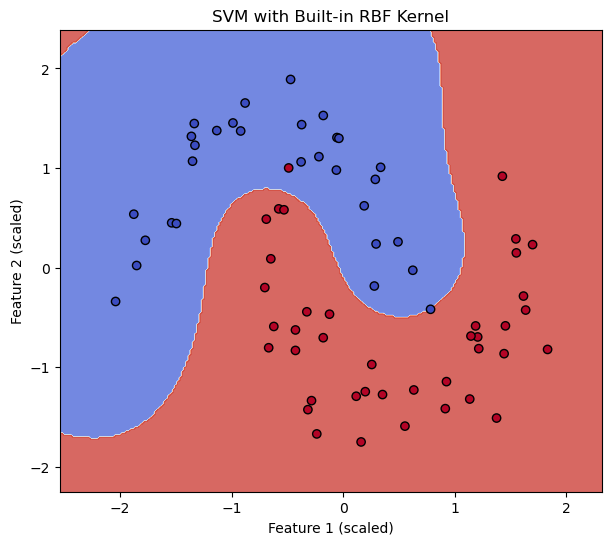

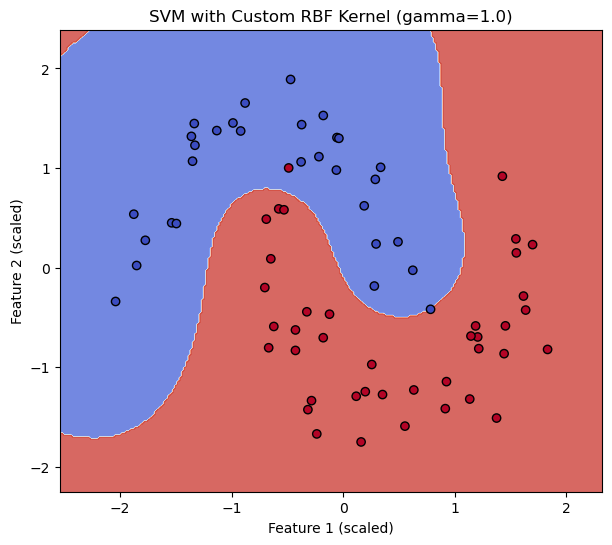

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define RBF kernel to be explicitly used as a callable for SVC ---
# (The one above should mostly work, but let's be explicit about the Gram matrix)
def sklearn_compatible_rbf_kernel(X, Y, gamma=1.0):
    """
    Computes the RBF kernel matrix between X and Y.
    If Y is None, computes K(X, X).
    X: array of shape (n_samples_X, n_features)
    Y: array of shape (n_samples_Y, n_features)
    """
    from sklearn.metrics.pairwise import euclidean_distances
    if Y is None:
        Y = X # Compute K(X,X)

    sq_distances = euclidean_distances(X, Y, squared=True)
    return np.exp(-gamma * sq_distances)

# --- Generate some non-linear data ---
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for better SVM performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM with Scikit-learn's built-in RBF kernel ---
svm_builtin_rbf = SVC(kernel='rbf', gamma=1.0, C=1.0, random_state=42) # Using gamma=1.0 for comparison
svm_builtin_rbf.fit(X_train_scaled, y_train)
score_builtin = svm_builtin_rbf.score(X_test_scaled, y_test)
print(f"SVM with built-in RBF kernel accuracy: {score_builtin:.4f}")

# --- Train SVM with our custom RBF kernel ---
# Define a wrapper for our custom kernel with a specific gamma
custom_gamma = 1.0
my_custom_rbf = lambda X_mat, Y_mat: sklearn_compatible_rbf_kernel(X_mat, Y_mat, gamma=custom_gamma)
# Alternatively, for older sklearn versions or more complex scenarios,
# you might need to precompute the Gram matrix if the callable signature is strict.
# However, modern sklearn SVC accepts a callable that computes K(X,Y).

svm_custom_rbf = SVC(kernel=my_custom_rbf, C=1.0, random_state=42)
svm_custom_rbf.fit(X_train_scaled, y_train)
score_custom = svm_custom_rbf.score(X_test_scaled, y_test)
print(f"SVM with custom RBF kernel (gamma={custom_gamma}) accuracy: {score_custom:.4f}")

# --- Plot decision boundaries (Helper function, simplified) ---
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")

plot_decision_boundary(svm_builtin_rbf, X_train_scaled, y_train, "SVM with Built-in RBF Kernel")
plt.show()

plot_decision_boundary(svm_custom_rbf, X_train_scaled, y_train, f"SVM with Custom RBF Kernel (gamma={custom_gamma})")
plt.show()

Custom Linear: 0.8500
Sklearn Linear: 0.8500
Custom RBF: 0.9500
Sklearn RBF: 0.9500
Custom Poly: 0.8600
Sklearn Poly: 0.8600


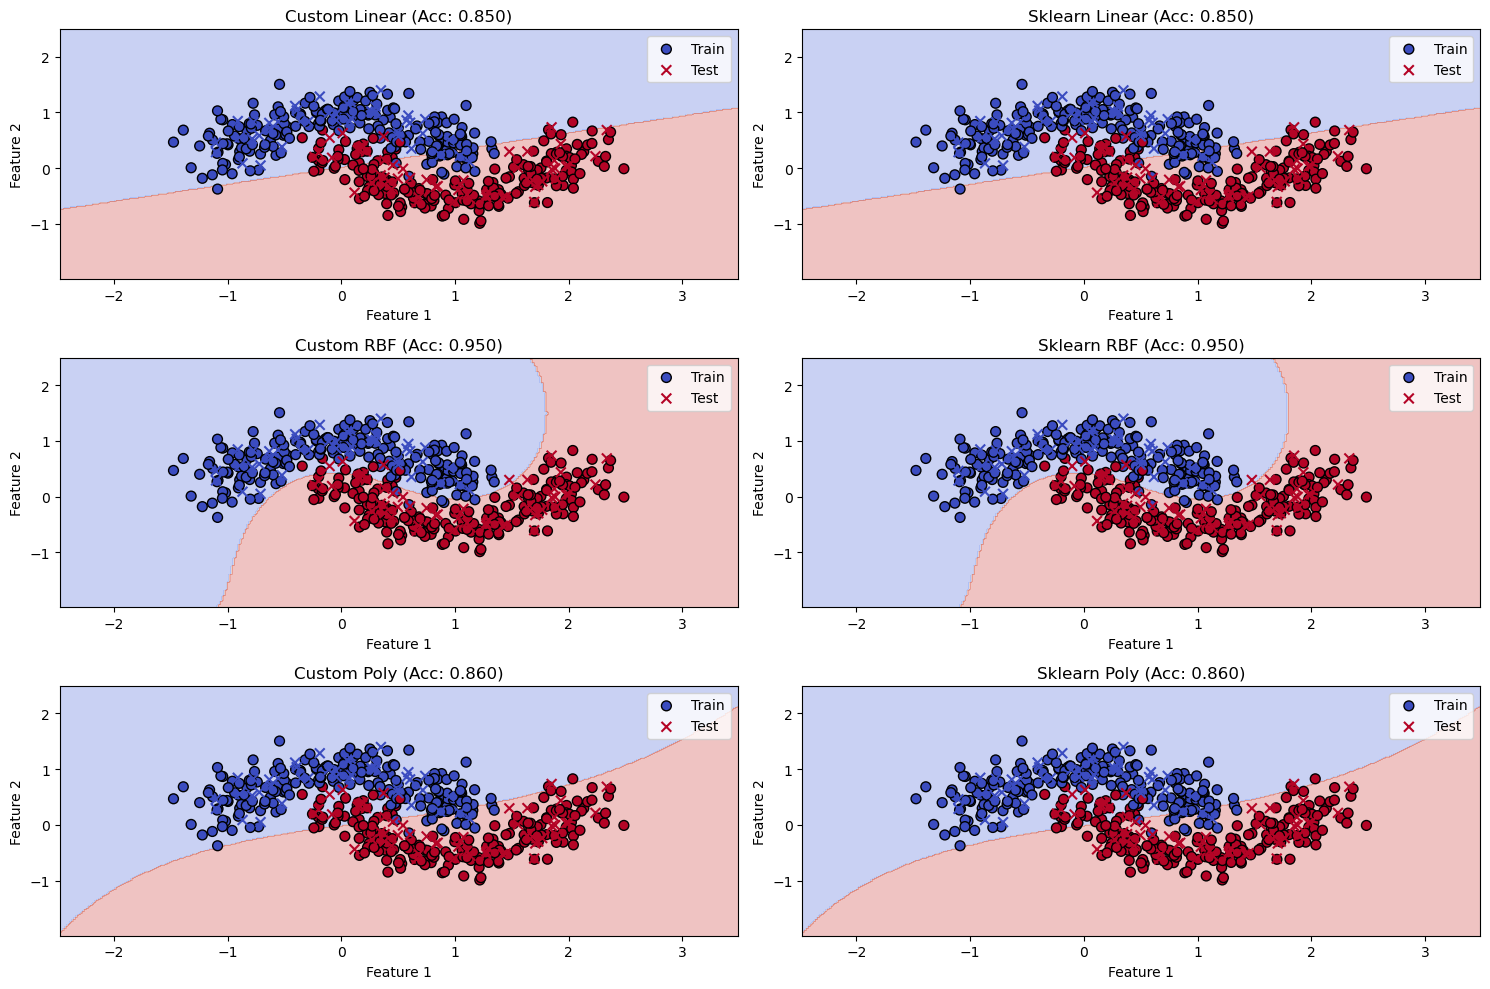

In [23]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

class SMO:
    def __init__(self, C=1.0, tol=1e-3, max_iter=1000, kernel='linear', gamma=1.0, degree=3):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.alphas = None
        self.b = 0
        self.X = None
        self.y = None
        self.kernel_matrix = None
        self.support_vectors = None
        self.support_vector_indices = None
        self.support_vector_alphas = None
        self.support_vector_y = None

    def _kernel(self, X1, X2=None):
        """Compute kernel matrix between X1 and X2"""
        if X2 is None:
            X2 = X1
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * cdist(X1, X2, 'sqeuclidean'))
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(X1, X2.T) + 1.0) ** self.degree
        else:
            return np.dot(X1, X2.T)

    def _compute_error_full(self, i):
        """Compute error for sample i without cache"""
        kernel_i = self.kernel_matrix[i]
        return np.sum(self.alphas * self.y * kernel_i) + self.b - self.y[i]

    def _compute_error(self, i):
        """Compute error for sample i, using cache if applicable"""
        if 0 < self.alphas[i] < self.C:
            return self.errors[i]
        return self._compute_error_full(i)

    def _select_second_alpha(self, i, error_i):
        """Select second alpha that maximizes the step size"""
        valid_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
        if len(valid_indices) > 1:
            max_delta = 0
            j = -1
            for k in valid_indices:
                if k == i:
                    continue
                error_k = self.errors[k]
                delta = abs(error_i - error_k)
                if delta > max_delta:
                    max_delta = delta
                    j = k
            if j >= 0:
                return j
        j = i
        while j == i:
            j = np.random.randint(0, self.alphas.shape[0])
        return j

    def _take_step(self, i, j):
        """Update alphas[i] and alphas[j]"""
        if i == j:
            return 0
        alpha_i_old = self.alphas[i]
        alpha_j_old = self.alphas[j]
        y_i, y_j = self.y[i], self.y[j]

        if y_i != y_j:
            L = max(0, alpha_j_old - alpha_i_old)
            H = min(self.C, self.C + alpha_j_old - alpha_i_old)
        else:
            L = max(0, alpha_i_old + alpha_j_old - self.C)
            H = min(self.C, alpha_i_old + alpha_j_old)

        if L == H:
            return 0

        K_ii = self.kernel_matrix[i, i]
        K_jj = self.kernel_matrix[j, j]
        K_ij = self.kernel_matrix[i, j]
        eta = 2 * K_ij - K_ii - K_jj

        if eta < 0:
            error_i = self._compute_error(i)
            error_j = self._compute_error(j)
            self.alphas[j] -= y_j * (error_i - error_j) / eta
            self.alphas[j] = min(H, max(L, self.alphas[j]))
            if abs(self.alphas[j] - alpha_j_old) < 1e-5:
                return 0
            self.alphas[i] += y_i * y_j * (alpha_j_old - self.alphas[j])
            b1 = self.b - error_i - y_i * (self.alphas[i] - alpha_i_old) * K_ii - y_j * (self.alphas[j] - alpha_j_old) * K_ij
            b2 = self.b - error_j - y_i * (self.alphas[i] - alpha_i_old) * K_ij - y_j * (self.alphas[j] - alpha_j_old) * K_jj
            if 0 < self.alphas[i] < self.C:
                self.b = b1
            elif 0 < self.alphas[j] < self.C:
                self.b = b2
            else:
                self.b = (b1 + b2) / 2
            non_bound_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
            for k in non_bound_indices:
                self.errors[k] = self._compute_error_full(k)
            return 1
        return 0

    def fit(self, X, y):
        """Train SVM using SMO algorithm"""
        self.X = X
        self.y = np.where(y <= 0, -1, 1)
        n_samples = X.shape[0]
        self.alphas = np.zeros(n_samples)
        self.b = 0
        self.kernel_matrix = self._kernel(X)
        self.errors = np.zeros(n_samples)
        for i in range(n_samples):
            self.errors[i] = self._compute_error_full(i)

        num_changed = 0
        examine_all = True
        iteration = 0

        while (iteration < self.max_iter) and (num_changed > 0 or examine_all):
            num_changed = 0
            if examine_all:
                for i in range(n_samples):
                    num_changed += self._examine_example(i)
            else:
                non_bound_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
                for i in non_bound_indices:
                    num_changed += self._examine_example(i)
            examine_all = False if examine_all else (num_changed == 0)
            iteration += 1

        self.support_vector_indices = np.where(self.alphas > self.tol)[0]
        self.support_vectors = self.X[self.support_vector_indices]
        self.support_vector_alphas = self.alphas[self.support_vector_indices]
        self.support_vector_y = self.y[self.support_vector_indices]
        return self

    def _examine_example(self, i):
        """Examine example to see if it violates KKT conditions"""
        y_i = self.y[i]
        alpha_i = self.alphas[i]
        error_i = self._compute_error(i)
        r_i = error_i * y_i
        if ((r_i < -self.tol and alpha_i < self.C) or (r_i > self.tol and alpha_i > 0)):
            if len(np.where((self.alphas > 0) & (self.alphas < self.C))[0]) > 1:
                j = self._select_second_alpha(i, error_i)
                if self._take_step(i, j):
                    return 1
            non_bound = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
            np.random.shuffle(non_bound)
            for j in non_bound:
                if self._take_step(i, j):
                    return 1
            all_indices = np.arange(self.alphas.shape[0])
            np.random.shuffle(all_indices)
            for j in all_indices:
                if self._take_step(i, j):
                    return 1
        return 0

    def decision_function(self, X):
        """Apply SVM to X"""
        if self.support_vectors is None:
            kernel = self._kernel(X, self.X)
            decision = np.dot(kernel, self.alphas * self.y) + self.b
        else:
            kernel = self._kernel(X, self.support_vectors)
            decision = np.dot(kernel, self.support_vector_alphas * self.support_vector_y) + self.b
        return decision

    def predict(self, X):
        """Predict class labels for samples in X"""
        return np.sign(self.decision_function(X))

# Generate non-linearly separable data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with consistent parameters
models = {
    'Custom Linear': SMO(kernel='linear', C=1.0, max_iter=1000),
    'Sklearn Linear': SVC(kernel='linear', C=1.0),
    'Custom RBF': SMO(kernel='rbf', gamma=0.5, max_iter=1000),
    'Sklearn RBF': SVC(kernel='rbf', gamma=0.5, C=1.0),
    'Custom Poly': SMO(kernel='poly', degree=3, gamma=0.1, max_iter=1000),
    'Sklearn Poly': SVC(kernel='poly', degree=3, gamma=0.1, coef0=1.0, C=1.0),
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    print(f"{name}: {results[name]:.4f}")

# Plot decision boundaries
def plot_decision_boundaries(X_train, y_train, X_test, y_test, models, results):
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    plt.figure(figsize=(15, 10))
    for i, (name, model) in enumerate(models.items(), 1):
        Z = model.predict(grid)
        Z = Z.reshape(xx.shape)
        plt.subplot(3, 2, i)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Train')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=50, marker='x', label='Test')
        plt.title(f'{name} (Acc: {results[name]:.3f})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
    plt.tight_layout()
    plt.savefig('smo_vs_sklearn_comparison.png')

plot_decision_boundaries(X_train, y_train, X_test, y_test, models, results)

I'll explain the code in depth using Markdown for formatting and `$` for mathematical expressions where applicable. This code implements a Support Vector Machine (SVM) using the Sequential Minimal Optimization (SMO) algorithm, with support for linear, RBF, and polynomial kernels. It also compares the custom implementation to scikit-learn's `SVC` and visualizes decision boundaries. Let's break it down step by step.

---

## Overview

This code is a custom implementation of an SVM classifier trained using the SMO algorithm. The SMO algorithm optimizes the SVM's dual problem by iteratively updating pairs of Lagrange multipliers (alphas). The implementation includes:

- **SMO Class**: Core logic for training the SVM.
- **Kernel Functions**: Linear, RBF, and polynomial kernels for handling linear and non-linear data.
- **Training and Prediction**: Methods to fit the model and predict labels.
- **Comparison and Visualization**: Validates the implementation against scikit-learn and plots decision boundaries.

The code uses the `make_moons` dataset (a non-linearly separable dataset) to demonstrate the effectiveness of different kernels.

---

## SMO Class

### Initialization

```python
class SMO:
    def __init__(self, C=1.0, tol=1e-3, max_iter=1000, kernel='linear', gamma=1.0, degree=3):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.alphas = None
        self.b = 0
        self.X = None
        self.y = None
        self.kernel_matrix = None
        self.support_vectors = None
        self.support_vector_indices = None
        self.support_vector_alphas = None
        self.support_vector_y = None
```

- **Parameters**:
  - `C`: Regularization parameter controlling the trade-off between margin maximization and classification error ($C > 0$).
  - `tol`: Numerical tolerance for stopping criteria (e.g., $10^{-3}$).
  - `max_iter`: Maximum number of iterations (e.g., 1000).
  - `kernel`: Kernel type ('linear', 'rbf', 'poly').
  - `gamma`: Kernel coefficient for RBF and polynomial kernels.
  - `degree`: Degree of the polynomial kernel (e.g., 3).

- **Attributes**:
  - `alphas`: Lagrange multipliers for the dual problem (initialized later).
  - `b`: Bias term in the decision function.
  - `X`, `y`: Training features and labels.
  - `kernel_matrix`: Precomputed kernel values between training samples.
  - Support vector attributes (`support_vectors`, etc.): Store vectors with $\alpha_i > 0$.

---

### Kernel Function

```python
def _kernel(self, X1, X2=None):
    if X2 is None:
        X2 = X1
    if self.kernel == 'linear':
        return np.dot(X1, X2.T)
    elif self.kernel == 'rbf':
        return np.exp(-self.gamma * cdist(X1, X2, 'sqeuclidean'))
    elif self.kernel == 'poly':
        return (self.gamma * np.dot(X1, X2.T) + 1.0) ** self.degree
    else:
        return np.dot(X1, X2.T)
```

- **Purpose**: Computes the kernel matrix $K(X1, X2)$ between two sets of vectors.
- **Math**:
  - **Linear Kernel**: $K(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T \mathbf{y}$
  - **RBF Kernel**: $K(\mathbf{x}, \mathbf{y}) = \exp(-\gamma \|\mathbf{x} - \mathbf{y}\|^2)$, where `cdist` computes the squared Euclidean distance.
  - **Polynomial Kernel**: $K(\mathbf{x}, \mathbf{y}) = (\gamma \mathbf{x}^T \mathbf{y} + 1)^d$, where $d$ is `degree`.

- **Implementation**: If `X2` is not provided, it computes the kernel of `X1` with itself (e.g., for training).

---

### Error Computation

```python
def _compute_error_full(self, i):
    kernel_i = self.kernel_matrix[i]
    return np.sum(self.alphas * self.y * kernel_i) + self.b - self.y[i]

def _compute_error(self, i):
    if 0 < self.alphas[i] < self.C:
        return self.errors[i]
    return self._compute_error_full(i)
```

- **Purpose**: Computes the error $E_i = f(\mathbf{x}_i) - y_i$, where $f(\mathbf{x}_i)$ is the decision function.
- **Math**: $f(\mathbf{x}_i) = \sum_{j=1}^n \alpha_j y_j K(\mathbf{x}_i, \mathbf{x}_j) + b$
- **Details**:
  - `_compute_error_full`: Full computation using all alphas and the kernel row for sample $i$.
  - `_compute_error`: Uses cached error for non-bound samples ($0 < \alpha_i < C$), otherwise recomputes.

---

### Alpha Selection

```python
def _select_second_alpha(self, i, error_i):
    valid_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
    if len(valid_indices) > 1:
        max_delta = 0
        j = -1
        for k in valid_indices:
            if k == i:
                continue
            error_k = self.errors[k]
            delta = abs(error_i - error_k)
            if delta > max_delta:
                max_delta = delta
                j = k
        if j >= 0:
            return j
    j = i
    while j == i:
        j = np.random.randint(0, self.alphas.shape[0])
    return j
```

- **Purpose**: Selects the second alpha index $j$ to pair with $i$ for optimization.
- **Strategy**:
  1. Prefers non-bound samples ($0 < \alpha_k < C$) with the largest $|E_i - E_k|$ to maximize the step.
  2. If no suitable $j$ is found, picks a random index (ensuring $j \neq i$).

---

### Take Step

```python
def _take_step(self, i, j):
    if i == j:
        return 0
    alpha_i_old = self.alphas[i]
    alpha_j_old = self.alphas[j]
    y_i, y_j = self.y[i], self.y[j]

    if y_i != y_j:
        L = max(0, alpha_j_old - alpha_i_old)
        H = min(self.C, self.C + alpha_j_old - alpha_i_old)
    else:
        L = max(0, alpha_i_old + alpha_j_old - self.C)
        H = min(self.C, alpha_i_old + alpha_j_old)

    if L == H:
        return 0

    K_ii = self.kernel_matrix[i, i]
    K_jj = self.kernel_matrix[j, j]
    K_ij = self.kernel_matrix[i, j]
    eta = 2 * K_ij - K_ii - K_jj

    if eta < 0:
        error_i = self._compute_error(i)
        error_j = self._compute_error(j)
        self.alphas[j] -= y_j * (error_i - error_j) / eta
        self.alphas[j] = min(H, max(L, self.alphas[j]))
        if abs(self.alphas[j] - alpha_j_old) < 1e-5:
            return 0
        self.alphas[i] += y_i * y_j * (alpha_j_old - self.alphas[j])
        b1 = self.b - error_i - y_i * (self.alphas[i] - alpha_i_old) * K_ii - y_j * (self.alphas[j] - alpha_j_old) * K_ij
        b2 = self.b - error_j - y_i * (self.alphas[i] - alpha_i_old) * K_ij - y_j * (self.alphas[j] - alpha_j_old) * K_jj
        if 0 < self.alphas[i] < self.C:
            self.b = b1
        elif 0 < self.alphas[j] < self.C:
            self.b = b2
        else:
            self.b = (b1 + b2) / 2
        non_bound_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
        for k in non_bound_indices:
            self.errors[k] = self._compute_error_full(k)
        return 1
    return 0
```

- **Purpose**: Updates $\alpha_i$ and $\alpha_j$ if they can improve the objective.
- **Steps**:
  1. **Bounds**: Compute $L$ and $H$ based on $y_i$, $y_j$, and $C$ constraints:
     - If $y_i \neq y_j$: $L = \max(0, \alpha_j - \alpha_i)$, $H = \min(C, C + \alpha_j - \alpha_i)$
     - If $y_i = y_j$: $L = \max(0, \alpha_i + \alpha_j - C)$, $H = \min(C, \alpha_i + \alpha_j)$
  2. **Eta**: $\eta = 2 K(\mathbf{x}_i, \mathbf{x}_j) - K(\mathbf{x}_i, \mathbf{x}_i) - K(\mathbf{x}_j, \mathbf{x}_j)$
  3. **Update $\alpha_j$**: $\alpha_j = \alpha_j - y_j \frac{E_i - E_j}{\eta}$, clipped to $[L, H]$.
  4. **Update $\alpha_i$**: $\alpha_i = \alpha_i + y_i y_j (\alpha_j^{\text{old}} - \alpha_j)$.
  5. **Update $b$**: Compute new bias using updated alphas and select based on non-bound conditions.
  6. **Update Errors**: Recalculate errors for non-bound samples.
- **Return**: 1 if updated, 0 if not.

---

### Fit Method

```python
def fit(self, X, y):
    self.X = X
    self.y = np.where(y <= 0, -1, 1)
    n_samples = X.shape[0]
    self.alphas = np.zeros(n_samples)
    self.b = 0
    self.kernel_matrix = self._kernel(X)
    self.errors = np.zeros(n_samples)
    for i in range(n_samples):
        self.errors[i] = self._compute_error_full(i)

    num_changed = 0
    examine_all = True
    iteration = 0

    while (iteration < self.max_iter) and (num_changed > 0 or examine_all):
        num_changed = 0
        if examine_all:
            for i in range(n_samples):
                num_changed += self._examine_example(i)
        else:
            non_bound_indices = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
            for i in non_bound_indices:
                num_changed += self._examine_example(i)
        examine_all = False if examine_all else (num_changed == 0)
        iteration += 1

    self.support_vector_indices = np.where(self.alphas > self.tol)[0]
    self.support_vectors = self.X[self.support_vector_indices]
    self.support_vector_alphas = self.alphas[self.support_vector_indices]
    self.support_vector_y = self.y[self.support_vector_indices]
    return self
```

- **Purpose**: Trains the SVM by optimizing alphas.
- **Process**:
  1. Initialize data, converting labels to $\{-1, 1\}$.
  2. Compute kernel matrix and initial errors.
  3. Iterate until convergence or `max_iter`:
     - If `examine_all`, check all samples.
     - Otherwise, check only non-bound samples.
  4. Store support vectors (samples with $\alpha_i > \text{tol}$).

---

### Examine Example

```python
def _examine_example(self, i):
    y_i = self.y[i]
    alpha_i = self.alphas[i]
    error_i = self._compute_error(i)
    r_i = error_i * y_i
    if ((r_i < -self.tol and alpha_i < self.C) or (r_i > self.tol and alpha_i > 0)):
        if len(np.where((self.alphas > 0) & (self.alphas < self.C))[0]) > 1:
            j = self._select_second_alpha(i, error_i)
            if self._take_step(i, j):
                return 1
        non_bound = np.where((self.alphas > 0) & (self.alphas < self.C))[0]
        np.random.shuffle(non_bound)
        for j in non_bound:
            if self._take_step(i, j):
                return 1
        all_indices = np.arange(self.alphas.shape[0])
        np.random.shuffle(all_indices)
        for j in all_indices:
            if self._take_step(i, j):
                return 1
    return 0
```

- **Purpose**: Checks if sample $i$ violates KKT conditions and optimizes it with another $j$.
- **KKT Check**: $r_i = E_i y_i$, optimize if $r_i < -\text{tol}$ and $\alpha_i < C$, or $r_i > \text{tol}$ and $\alpha_i > 0$.
- **Strategy**: Tries heuristic $j$, then non-bound samples, then all samples randomly.

---

### Decision Function and Predict

```python
def decision_function(self, X):
    if self.support_vectors is None:
        kernel = self._kernel(X, self.X)
        decision = np.dot(kernel, self.alphas * self.y) + self.b
    else:
        kernel = self._kernel(X, self.support_vectors)
        decision = np.dot(kernel, self.support_vector_alphas * self.support_vector_y) + self.b
    return decision

def predict(self, X):
    return np.sign(self.decision_function(X))
```

- **decision_function**: $f(\mathbf{x}) = \sum_{i \in SV} \alpha_i y_i K(\mathbf{x}, \mathbf{x}_i) + b$
- **predict**: Returns $\text{sign}(f(\mathbf{x})) \in \{-1, 1\}$.

---

## Main Script

### Data Generation

```python
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- Generates a two-class, moon-shaped dataset with 500 samples and splits it into train/test sets.

---

### Model Definitions

```python
models = {
    'Custom Linear': SMO(kernel='linear', C=1.0, max_iter=1000),
    'Sklearn Linear': SVC(kernel='linear', C=1.0),
    'Custom RBF': SMO(kernel='rbf', gamma=0.5, max_iter=1000),
    'Sklearn RBF': SVC(kernel='rbf', gamma=0.5, C=1.0),
    'Custom Poly': SMO(kernel='poly', degree=3, gamma=0.1, max_iter=1000),
    'Sklearn Poly': SVC(kernel='poly', degree=3, gamma=0.1, coef0=1.0, C=1.0),
}
```

- Compares custom SMO with scikit-learn `SVC` across three kernels.

---

### Training and Evaluation

```python
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    print(f"{name}: {results[name]:.4f}")
```

- Trains each model and prints test accuracy.

---

### Visualization

```python
def plot_decision_boundaries(X_train, y_train, X_test, y_test, models, results):
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    plt.figure(figsize=(15, 10))
    for i, (name, model) in enumerate(models.items(), 1):
        Z = model.predict(grid)
        Z = Z.reshape(xx.shape)
        plt.subplot(3, 2, i)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Train')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=50, marker='x', label='Test')
        plt.title(f'{name} (Acc: {results[name]:.3f})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
    plt.tight_layout()
    plt.savefig('smo_vs_sklearn_comparison.png')
```

- Plots decision boundaries using a grid, comparing custom and scikit-learn models.

---

## Conclusion

This code provides a detailed implementation of the SMO algorithm for SVMs, supporting multiple kernels. It effectively demonstrates the differences between linear and non-linear kernels on the `make_moons` dataset and validates the implementation against scikit-learn's `SVC`. The visualization highlights how kernel choice affects decision boundaries. Let me know if you need further clarification!

In [ ]:
# Your code here